
**Nombre: Alexis Hernández Martínez**

**Nombre: Norma de los Ángeles García López**

**Matrícula: A01016308**

**Matrícula: A01228278**

**Materia: Ciencia y Analítica de Datos**

**Profesor: Dra. María de la Paz Rico**

**Fecha: Domingo 13 Noviembre 2022**

Nombre de la Entrega: Reto: **Entrega 2: Clasificación-ensambles y presentación ejecutiva (10 diapositivas max)**


## **Clasificación**

En esta base de datos encontraras:

Aguas subterráneas.
Aguas superficiales.:
Utilizando la base de datos que hayas elegido y hayas realizado su limpieza en la anterior entrega del reto, realiza lo siguiente:

- Selecciona tus variables independientes X y dependiente Y (semáforo)
- Cambia a one hot encoding el semáforo
- Realiza un análisis general de las features importances a traves de decision trees o random forest.
- Selecciona las variables de mayor importancia.
- Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)
- Explora que clasificador es el más optimo, ejemplo:
- Decision trees
- Random Forest.
- Determina el grado de exactitud a través del reporte de clasificación y análisis de la gráfica de Precision Recall.
- Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.
- Realiza un reporte de los principales hallazgos y conclusiones del experimento e incluyelos en una presentación ejecutiva de 10 diapositivas. La presentación deberá incluir todos los pasos del pipeline seguidos, limpieza, análisis, kmeans, clasificación, resultados y conclusiones.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, make_scorer
from sklearn.metrics import fbeta_score, make_scorer

from sklearn import tree
import pydotplus 
from IPython.display import Image

from sklearn.model_selection import learning_curve, validation_curve

from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import precision_recall_curve
from itertools import cycle
from sklearn.metrics import average_precision_score

from sklearn.preprocessing import label_binarize

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier
from sklearn.inspection import permutation_importance



In [2]:
# Cargamos ambos archivos, tanto el de Aguas Superficiales como el de Aguas Subterráneas ya limpios

url1 = '/Users/alexishema/Downloads/DF_Superficiales_Limpio.csv'
url2 = '/Users/alexishema/Downloads/DF_Subterraneas_Limpio.csv'

df_Superficiales = pd.read_csv(url1)
df_Subterraneas = pd.read_csv(url2)



In [3]:
# Aquí definimos las métricas a utilizar
# Se agrega el factor np.finfo(np.float32).eps, para evitar errores en hipotéticas divisiones entre cero 

def mi_accuracy(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  VPC1 = cm[0,0]
  VPC2 = cm[1,1]
  VPC3 = cm[2,2]
  vp = VPC1 + VPC2 + VPC3

  FPC1 = cm[0,1] + cm[0,2]
  FPC2 = cm[1,0] + cm[1,2]
  FPC3 = cm[2,0] + cm[2,1]
  fp = FPC1 + FPC2 + FPC3
  
  FNC1 = cm[1,0] + cm[2,0]
  FNC2 = cm[0,1] + cm[2,1]
  FNC3 = cm[0,2] + cm[1,2]
  fn = FNC1 + FNC2 + FNC3

  VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
  VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
  VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
  vn = VNC1 + VNC2 + VNC3

  return (vp+vn)/(vp+vn+fp+fn+np.finfo(np.float32).eps)
   

#Funcion Precision
def mi_precision(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  VPC1 = cm[0,0]
  VPC2 = cm[1,1]
  VPC3 = cm[2,2]
  vp = VPC1 + VPC2 + VPC3

  FPC1 = cm[0,1] + cm[0,2]
  FPC2 = cm[1,0] + cm[1,2]
  FPC3 = cm[2,0] + cm[2,1]
  fp = FPC1 + FPC2 + FPC3
  
  FNC1 = cm[1,0] + cm[2,0]
  FNC2 = cm[0,1] + cm[2,1]
  FNC3 = cm[0,2] + cm[1,2]
  fn = FNC1 + FNC2 + FNC3

  VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
  VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
  VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
  vn = VNC1 + VNC2 + VNC3

  result = (vp)/(vp+fp+np.finfo(np.float32).eps)  
  return result

#Funcion recall
def mi_recall(yreal, ypred):

  cm = confusion_matrix(yreal, ypred)

  VPC1 = cm[0,0]
  VPC2 = cm[1,1]
  VPC3 = cm[2,2]
  vp = VPC1 + VPC2 + VPC3

  FPC1 = cm[0,1] + cm[0,2]
  FPC2 = cm[1,0] + cm[1,2]
  FPC3 = cm[2,0] + cm[2,1]
  fp = FPC1 + FPC2 + FPC3
  
  FNC1 = cm[1,0] + cm[2,0]
  FNC2 = cm[0,1] + cm[2,1]
  FNC3 = cm[0,2] + cm[1,2]
  fn = FNC1 + FNC2 + FNC3

  VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
  VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
  VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
  vn = VNC1 + VNC2 + VNC3
  
  return (vp)/(vp+fn+np.finfo(np.float32).eps)

#Funcin G-Mean
def mi_gmean(yreal, ypred):

    cm = confusion_matrix(yreal, ypred)
    VPC1 = cm[0,0]
    VPC2 = cm[1,1]
    VPC3 = cm[2,2]
    vp = VPC1 + VPC2 + VPC3

    FPC1 = cm[0,1] + cm[0,2]
    FPC2 = cm[1,0] + cm[1,2]
    FPC3 = cm[2,0] + cm[2,1]
    fp = FPC1 + FPC2 + FPC3
  
    FNC1 = cm[1,0] + cm[2,0]
    FNC2 = cm[0,1] + cm[2,1]
    FNC3 = cm[0,2] + cm[1,2]
    fn = FNC1 + FNC2 + FNC3

    VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
    VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
    VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
    vn = VNC1 + VNC2 + VNC3
    
    recall = vp / (vp+fn+np.finfo(np.float32).eps)
    especificidad = vn / (vn+fp+np.finfo(np.float32).eps)
    gmean = np.sqrt(recall * especificidad)

    return gmean

#Funcion f1-score
def mi_f1score(yreal, ypred):

    cm = confusion_matrix(yreal, ypred)
    VPC1 = cm[0,0]
    VPC2 = cm[1,1]
    VPC3 = cm[2,2]
    vp = VPC1 + VPC2 + VPC3

    FPC1 = cm[0,1] + cm[0,2]
    FPC2 = cm[1,0] + cm[1,2]
    FPC3 = cm[2,0] + cm[2,1]
    fp = FPC1 + FPC2 + FPC3
  
    FNC1 = cm[1,0] + cm[2,0]
    FNC2 = cm[0,1] + cm[2,1]
    FNC3 = cm[0,2] + cm[1,2]
    fn = FNC1 + FNC2 + FNC3

    VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
    VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
    VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
    vn = VNC1 + VNC2 + VNC3 
    
    return (2*vp)/((2*vp)+fp+fn+np.finfo(np.float32).eps)


my_accuracy = make_scorer(mi_accuracy)
my_precision = make_scorer(mi_precision)
my_recall = make_scorer(mi_recall)
my_f1score = make_scorer(mi_f1score)
my_gmean = make_scorer(mi_gmean)

mismetricas = {"Accuracy":my_accuracy,"Precision":my_precision,"Recall":my_recall,"F1Score":my_f1score,"Gmean":my_gmean}

In [4]:
# Definimos las variables de entrada X y de salida Y para hacer el split de las muestras Train Test
# Y1 es para Aguas Superficiales
# Y2 es para Aguas Subterráneas

Y1 = df_Superficiales[["SEMAFORO_Type"]]
Y2 = df_Subterraneas[["SEMAFORO_Type"]]


# X1 es para Aguas Superficiales
# X2 es para Aguas Subterráneas

# Aguas Superficiales
NumericasQuimicas1 = ['DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL','OD_PORC','OD_PORC_SUP','OD_PORC_MED',
             'OD_PORC_FON','TOX_D_48_UT','TOX_V_15_UT','TOX_D_48_SUP_UT','TOX_FIS_SUP_15_UT']

OrdinalesQuimicas1 = ['CALIDAD_DBO','CALIDAD_DQO','CALIDAD_SST','CALIDAD_COLI_FEC','CALIDAD_E_COLI','CALIDAD_ENTEROC','CALIDAD_OD_PORC','CALIDAD_OD_PORC_SUP','CALIDAD_OD_PORC_MED',
             'CALIDAD_OD_PORC_FON','CALIDAD_TOX_D_48','CALIDAD_TOX_V_15','CALIDAD TOX_D_48_SUP','CALIDAD_TOX_FIS_SUP_15']

CategoricasQuimicas1 = ['ESTADO','MUNICIPIO','TIPO','SUBTIPO']


# Aguas Subterráneas
NumericasQuimicas2 = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L',
                      ]

CategoricasQuimicas2 = ['CALIDAD_ALC','CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR',
                       'CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB',
                       'CALIDAD_MN','CALIDAD_FE']

OrdinalesQuimicas2 = ['ESTADO','MUNICIPIO','SUBTIPO']



# Dataset conformados por todos los tipos de variables, se pueden usar en RandomForest
X1 =  df_Superficiales[NumericasQuimicas1 + OrdinalesQuimicas1 + CategoricasQuimicas1]
X2 =  df_Subterraneas[NumericasQuimicas2 + OrdinalesQuimicas2 + CategoricasQuimicas2]

# Dataset conformados por solo variables numéricas, se pueden usar en DecisionTree
X1_num =  df_Superficiales[NumericasQuimicas1]
X2_num =  df_Subterraneas[NumericasQuimicas2]



In [5]:
# Realizamos las particiones correspondientes para X1 y X2

X1train, X1test, Y1train , Y1test = train_test_split(X1, Y1, train_size=0.85, random_state=42)
print("Para Aguas Superficiales X train es",X1train.shape)
print("Para Aguas Superficiales Y train es",Y1train.shape)

X2train, X2test, Y2train , Y2test = train_test_split(X2, Y2, train_size=0.85, random_state=42)
print("\nPara Aguas Subterráneas X train es",X2train.shape)
print("Para Aguas Subterráneas Y train es",Y2train.shape)

# Realizamos las particiones correspondientes para X1 y X2 versión numéricas

X1train_num, X1test_num, Y1train_num , Y1test_num = train_test_split(X1_num, Y1, train_size=0.85, random_state=42)
print("\nPara Aguas Superficiales X train numéricas es",X1train.shape)
print("Para Aguas Superficiales Y train numéricas es",Y1train.shape)

X2train_num, X2test_num, Y2train_num , Y2test_num = train_test_split(X2_num, Y2, train_size=0.85, random_state=42)
print("\nPara Aguas Subterráneas X train numéricas es",X2train.shape)
print("Para Aguas Subterráneas Y train numéricas es",Y2train.shape)



Para Aguas Superficiales X train es (2969, 32)
Para Aguas Superficiales Y train es (2969, 1)

Para Aguas Subterráneas X train es (907, 32)
Para Aguas Subterráneas Y train es (907, 1)

Para Aguas Superficiales X train numéricas es (2969, 32)
Para Aguas Superficiales Y train numéricas es (2969, 1)

Para Aguas Subterráneas X train numéricas es (907, 32)
Para Aguas Subterráneas Y train numéricas es (907, 1)


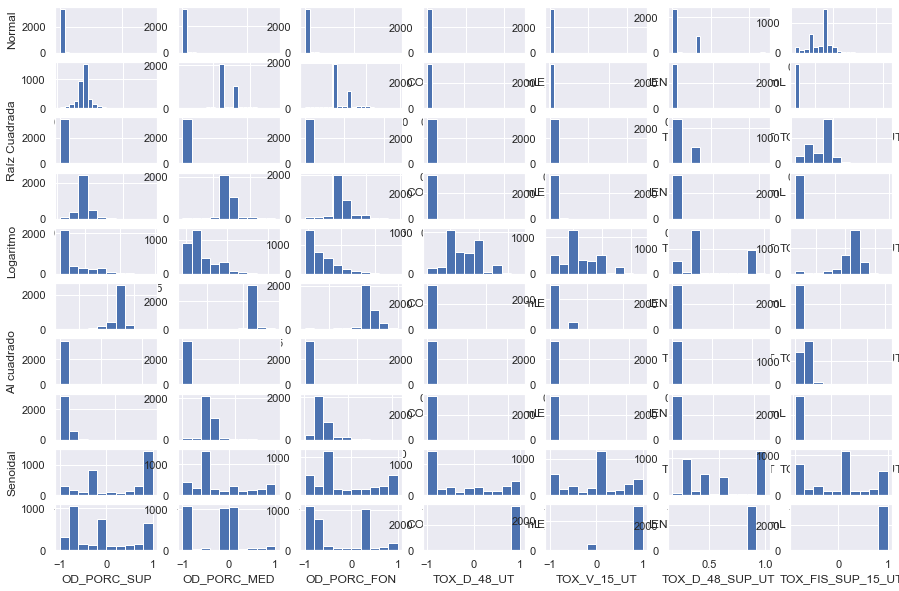

In [8]:
# Acá se realiza un análisis gráfico de los datos, con el objetivo de eliminar sesgo a la derecha o izquierda

# Análisis para Aguas Superficiales 

sns.set(rc={'figure.figsize':(15,10)})
fig, axes = plt.subplots(10, 7)   
for k in range(0,14):  
  plt.subplot(10,7,k+1) 

  Transf0 = df_Superficiales[NumericasQuimicas1].iloc[:,k].to_numpy().reshape(-1, 1)  
  plt.hist(Transf0, bins=20) 
  plt.xlabel(NumericasQuimicas1[k])
  if k==0:
    plt.ylabel('Normal')

  plt.subplot(10,7,k+15)    
  Transf1 = Transf0**1/2       
  plt.hist(Transf1)  
  plt.xlabel(NumericasQuimicas1[k])                    
  if k==0:
    plt.ylabel('Raíz Cuadrada')    

  plt.subplot(10,7,k+29)  
  Transf2 = np.log(Transf0)       
  plt.hist(Transf2)                      
  plt.xlabel(NumericasQuimicas1[k])
  if k==0:
    plt.ylabel('Logaritmo')

  plt.subplot(10,7,k+43)  
  Transf3 = Transf0**2    
  plt.hist(Transf3)   
  plt.xlabel(NumericasQuimicas1[k])
  if k==0:
    plt.ylabel('Al cuadrado')
    
  plt.subplot(10,7,k+57)  
  Transf4 = np.sin(Transf0)   
  plt.hist(Transf4)   
  plt.xlabel(NumericasQuimicas1[k])
  if k==0:
    plt.ylabel('Senoidal')  

plt.show()

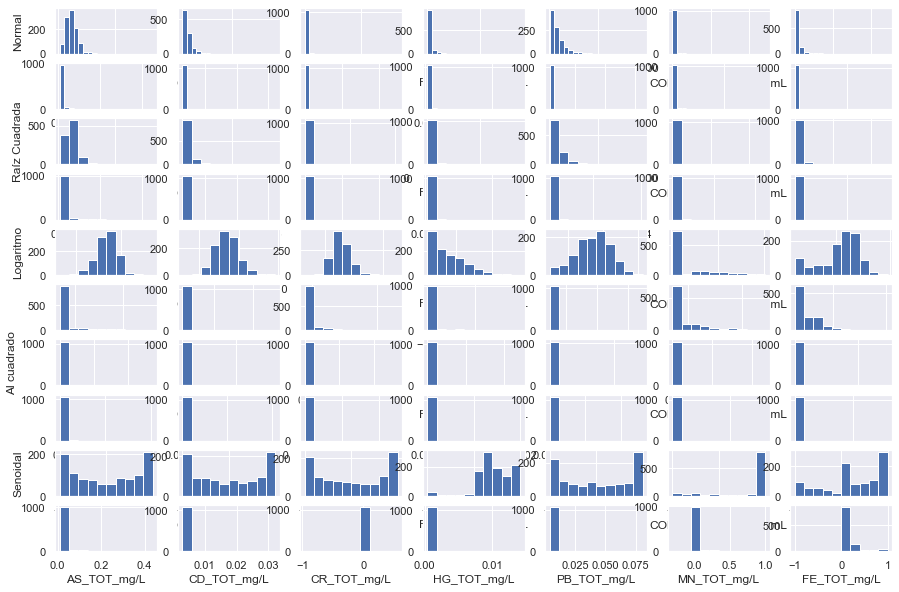

In [7]:
# Acá se realiza un análisis gráfico de los datos, con el objetivo de eliminar sesgo a la derecha o izquierda

# Análisis para Aguas Subterráneas

sns.set(rc={'figure.figsize':(15,10)})
fig, axes = plt.subplots(10, 7)   
for k in range(0,14):  
  plt.subplot(10,7,k+1) 

  Transf0 = df_Subterraneas[NumericasQuimicas2].iloc[:,k].to_numpy().reshape(-1, 1)  
  plt.hist(Transf0, bins=20) 
  plt.xlabel(NumericasQuimicas2[k])
  if k==0:
    plt.ylabel('Normal')

  plt.subplot(10,7,k+15)    
  Transf1 = Transf0**1/2       
  plt.hist(Transf1)  
  plt.xlabel(NumericasQuimicas2[k])                    
  if k==0:
    plt.ylabel('Raíz Cuadrada')    

  plt.subplot(10,7,k+29)  
  Transf2 = np.log(Transf0)       
  plt.hist(Transf2)                      
  plt.xlabel(NumericasQuimicas2[k])
  if k==0:
    plt.ylabel('Logaritmo')

  plt.subplot(10,7,k+43)  
  Transf3 = Transf0**2    
  plt.hist(Transf3)   
  plt.xlabel(NumericasQuimicas2[k])
  if k==0:
    plt.ylabel('Al cuadrado')
    
  plt.subplot(10,7,k+57)  
  Transf4 = np.sin(Transf0)   
  plt.hist(Transf4)   
  plt.xlabel(NumericasQuimicas2[k])
  if k==0:
    plt.ylabel('Senoidal')  

plt.show()

**Para ambos dataset, podemos notar que aplicar Logaritmo a los datos de entrada es lo que mejor centra los datos, por lo que nos iremos con esa función para los pipe**

In [12]:
# Procedemos a hacer la creación del Pipeline
# Realizamos el MinMaxScaler entre 1 y 3 para evitar divisiones entre 0
# PIPE para Aguas Superficiales aplicando logaritmo


Superficiales_numericas_pipeline = Pipeline(steps = [('Escalar', MinMaxScaler(feature_range=(1,3))) ,
                                         ('Logaritmo', FunctionTransformer(np.log))])  
Superficiales_numericas_nombres = NumericasQuimicas1



Superficiales_categoricas_pipeline = Pipeline(steps = [('OHE', OneHotEncoder(handle_unknown='ignore'))])
 
Superficiales_categoricas_nombres = CategoricasQuimicas1



Superficiales_ordinales_pipeline = Pipeline(steps = [('OHE', OneHotEncoder(handle_unknown='ignore'))])
   
Superficiales_ordinales_nombres = OrdinalesQuimicas1




CT1 = ColumnTransformer(transformers = [('numerica', Superficiales_numericas_pipeline, Superficiales_numericas_nombres),
                                         ('categorica', Superficiales_categoricas_pipeline,Superficiales_categoricas_nombres),
                                         ('ordinal', Superficiales_ordinales_pipeline,Superficiales_ordinales_nombres),
                                                       ],  remainder='passthrough')


CT1_num = ColumnTransformer(transformers = [('numerica', Superficiales_numericas_pipeline, Superficiales_numericas_nombres),]
                            ,  remainder='passthrough')

In [13]:
# Procedemos a hacer la creación del Pipeline
# Realizamos el MinMaxScaler entre 1 y 3 para evitar divisiones entre 0
# PIPE para Aguas Subterráneas aplicando logaritmo

Superficiales_numericas_pipeline2 = Pipeline(steps = [('Escalar', MinMaxScaler(feature_range=(1,3))) ,
                                         ('Logaritmo', FunctionTransformer(np.log))])  
Superficiales_numericas_nombres2 = NumericasQuimicas2



Superficiales_categoricas_pipeline2 = Pipeline(steps = [('OHE', OneHotEncoder(handle_unknown='ignore'))])
 
Superficiales_categoricas_nombres2 = CategoricasQuimicas2



Superficiales_ordinales_pipeline2 = Pipeline(steps = [ ('OHE', OneHotEncoder(handle_unknown='ignore'))])
   
Superficiales_ordinales_nombres2 = OrdinalesQuimicas2




CT2 = ColumnTransformer(transformers = [('numerica2', Superficiales_numericas_pipeline2, Superficiales_numericas_nombres2),
                                         ('categorica2', Superficiales_categoricas_pipeline2,Superficiales_categoricas_nombres2),
                                         ('ordinal2', Superficiales_ordinales_pipeline2,Superficiales_ordinales_nombres2),
                                                       ],  remainder='passthrough')

CT2_num = ColumnTransformer(transformers = [('numerica2', Superficiales_numericas_pipeline2, Superficiales_numericas_nombres2),]
                            ,  remainder='passthrough')

## **Análisis para Dataset1: Aguas Superficiales**

**En este punto, la idea es aplicar los modelos de Decision Tree y Random Forest. Para ambos modelos, la idea es aplicar un GridSearch para encontrar los mejores hiperparámetros. Con estos mejores hiperparámetros analizamos las distintas métricas, las graficamos en boxplot, sacamos la matriz de confusión, obtenemos la gráfica de curvas de entrenamiento y finalmente obtenemos el gráfico comparativo precision vs recall.**

In [14]:
# Empezamos a analizar con Decision Tree
# Decision Tree para Aguas Superficiales
# Para Decision Tree se decide utilizar solo las variables numéricas


modeloDT = DecisionTreeClassifier(random_state = 42)

# En este punto, se dejó Alpha ya con el mejor valor que encontramos, con la idea de que correr el modelo no tarde
# mucho tiempo 

# Mejor valor, 0.07
dicc_gridDT = {'m__ccp_alpha':[0.07],
              'm__criterion':['gini','entropy'],
              'm__max_depth':[1,8,15,20],
              'm__min_samples_split':[2,5,10],
              'm__class_weight':['balanced'],
                           }

                          
 
pipeline = Pipeline(steps=[('ct',CT1),('m',modeloDT)])
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
  

gridDT = GridSearchCV(estimator=pipeline, 
                    param_grid=dicc_gridDT, 
                    cv=cv, 
                    scoring= make_scorer(mi_gmean))


gridDT.fit(X1train,Y1train)
gridDT.best_params_

print('Mejor valor obtenido con la mejor combinación:', gridDT.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', gridDT.best_params_)
print('Métrica utilizada:', gridDT.scoring)

Mejor valor obtenido con la mejor combinación: 0.9752057968192761
Mejor combinación de valores encontrados de los hiperparámetros: {'m__ccp_alpha': 0.07, 'm__class_weight': 'balanced', 'm__criterion': 'gini', 'm__max_depth': 8, 'm__min_samples_split': 2}
Métrica utilizada: make_scorer(mi_gmean)


In [15]:
# En este punto, con los mejores hiperparámetros obtenidos, se procede a analizar cada una de las métricas

modeloDT_Optimizado = DecisionTreeClassifier(max_depth=gridDT.best_params_.get('m__max_depth'),
                                    ccp_alpha=gridDT.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridDT.best_params_.get('m__class_weight'),                                
                                    criterion=gridDT.best_params_.get('m__criterion'),
                                    min_samples_split=gridDT.best_params_.get('m__min_samples_split'),
                                    random_state = 42)

# for key, metric in mismetricas.items():
resultados = list()   
pipeline = Pipeline(steps=[('ct',CT1),('m',modeloDT_Optimizado)])
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)



scores = cross_validate(pipeline, X1train, np.ravel(Y1train), scoring=mismetricas, cv=cv, return_train_score=True)


resultados.append(scores)

print('\nmean Train Accuracy: %.3f (%.4f)\nmean Test Accuracy: %.3f (%.4f)\n\nmean Train Precision: %.3f (%.4f)\nmean Test Precision: %.3f (%.4f)\n\nmean Train Recall: %.3f (%.4f)\nmean Test Recall: %.3f (%.4f)\n\nmean Train Gmean: %.3f (%.4f)\nmean Test Gmean: %.3f (%.4f)\n\nmean Train F1score: %.3f (%.4f)\nmean Test F1score: %.3f (%.4f)\n' % (
                                                                                                 np.mean(resultados[0]['train_Accuracy']),
                                                                                                 np.std(resultados[0]['train_Accuracy']),
                                                                                                 np.mean(resultados[0]['test_Accuracy']),
                                                                                                 np.std(resultados[0]['test_Accuracy']),
                                                                                                 np.mean(resultados[0]['train_Precision']),
                                                                                                 np.std(resultados[0]['train_Precision']),  
                                                                                                 np.mean(resultados[0]['test_Precision']),
                                                                                                 np.std(resultados[0]['test_Precision']),  
                                                                                                 np.mean(resultados[0]['train_Recall']),
                                                                                                 np.std(resultados[0]['train_Recall']),
                                                                                                 np.mean(resultados[0]['test_Recall']),
                                                                                                 np.std(resultados[0]['test_Recall']),
                                                                                                 np.mean(resultados[0]['train_Gmean']),
                                                                                                 np.std(resultados[0]['train_Gmean']),
                                                                                                 np.mean(resultados[0]['test_Gmean']),
                                                                                                 np.std(resultados[0]['test_Gmean']),
                                                                                                 np.mean(resultados[0]['train_F1Score']),
                                                                                                 np.std(resultados[0]['train_F1Score']), 
                                                                                                 np.mean(resultados[0]['test_F1Score']),
                                                                                                 np.std(resultados[0]['test_F1Score']), 
                                                                                                  ))


mean Train Accuracy: 0.981 (0.0013)
mean Test Accuracy: 0.978 (0.0053)

mean Train Precision: 0.972 (0.0019)
mean Test Precision: 0.967 (0.0080)

mean Train Recall: 0.972 (0.0019)
mean Test Recall: 0.967 (0.0080)

mean Train Gmean: 0.979 (0.0014)
mean Test Gmean: 0.975 (0.0060)

mean Train F1score: 0.972 (0.0019)
mean Test F1score: 0.967 (0.0080)



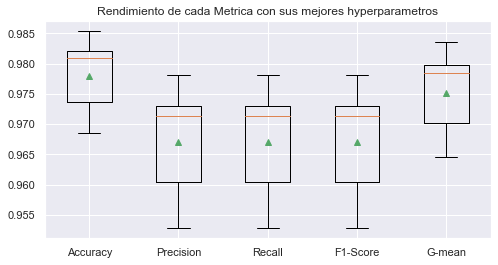

In [16]:
# Se hace un BoxPlot graficando las métricas obtenidas arriba 

sns.set(rc={'figure.figsize':(8,4)})
nombres = ['Accuracy','Precision','Recall','F1-Score','G-mean']
lista_metrica = ['test_Accuracy','test_Precision','test_Recall','test_F1Score','test_Gmean']
bpGmean = list()
for i in range(0,len(lista_metrica)):
  rr = resultados[0][lista_metrica[i]]
  bpGmean.append(rr)
plt.title('Rendimiento de cada Metrica con sus mejores hyperparametros')
plt.boxplot(bpGmean, labels = nombres, showmeans=True)
plt.show()

In [17]:
# A continuación se definen las funciones para lanzar la gráfica de curva de entrenamiento 

def mi_LearningCurvePlot(train_sizes, train_scores, val_scores, score_type):

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='darkblue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='darkblue')
    
    plt.plot(train_sizes, val_mean, color='darkgreen', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='darkgreen')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.grid()
    plt.ylabel(score_type)
    plt.legend(loc='lower left')
    plt.show()
    
def mi_ModeloYCurvasDT(Xin):
      

    modeloDT_Optimizado = DecisionTreeClassifier(max_depth=gridDT.best_params_.get('m__max_depth'),
                                    ccp_alpha=gridDT.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridDT.best_params_.get('m__class_weight'),                                
                                    criterion=gridDT.best_params_.get('m__criterion'),
                                    min_samples_split=gridDT.best_params_.get('m__min_samples_split'),
                                    random_state = 42)

    pipeline = Pipeline(steps=[('ct',CT1),('m',modeloDT_Optimizado)])


    mi_kfold = RepeatedKFold(n_splits=5, n_repeats=3,random_state=42)

       
    delta_train_sz = np.linspace(0.1, 1.0, num=40)

    tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline ,    
                                                        X = Xin,
                                                        y = Y1train,
                                                        cv = mi_kfold,
                                                        train_sizes = delta_train_sz,
                                                        scoring = make_scorer(mi_gmean),
                                                        random_state=42)
     
    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, "Accuracy")

Curvas de aprendizaje del modelo Decision Tree para Aguas Superficiales:


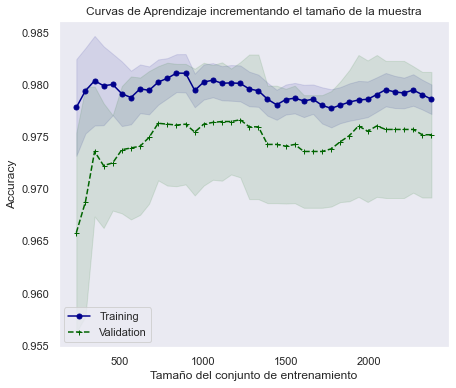

In [18]:
print('Curvas de aprendizaje del modelo Decision Tree para Aguas Superficiales:')
mi_ModeloYCurvasDT(X1train)

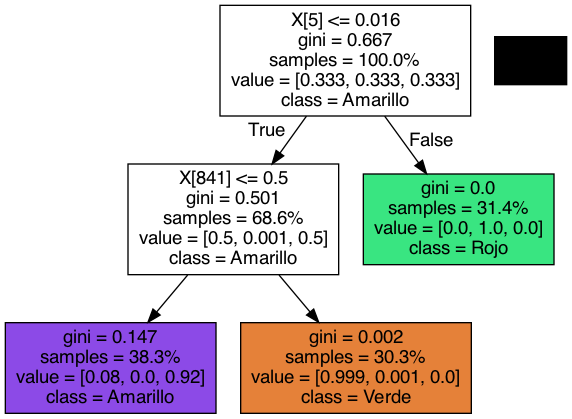

In [19]:
# Nuevamente, con los mejores hiperparámetros del DT, graficamos el árbol de decisiones 

Xct = CT1.fit(X1train)
Xxt = Xct.transform(X1train)
modeloDT_Optimizado.fit(Xxt, Y1train)


dot_data = tree.export_graphviz(decision_tree=modeloDT_Optimizado, 
                                out_file=None,
                                max_depth=gridDT.best_params_.get('m__max_depth'),
                                
                                class_names=["Verde","Rojo","Amarillo"],
                                filled=True,
                                rotate=False,
                                proportion=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

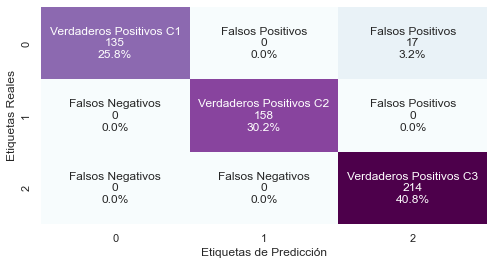

In [20]:
# Obtenemos la matriz de confusión con los mejores hiperparámetros 

pipeline = Pipeline(steps=[('ct',CT1),('m',modeloDT_Optimizado)])

pipeline.fit(X1train, Y1train)

yhat = pipeline.predict(X1test)

cm = confusion_matrix(Y1test, yhat)

txt = ['Verdaderos Positivos C1','Falsos Positivos','Falsos Positivos',
       'Falsos Negativos','Verdaderos Positivos C2', 'Falsos Positivos',
       'Falsos Negativos','Falsos Negativos','Verdaderos Positivos C3']
frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
labels = np.asarray(labels).reshape(3,3)
labels
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='BuPu', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
plt.show()

Feature: DBO_mg/L, Score: 0.00000
Feature: DQO_mg/L, Score: 0.00000
Feature: SST_mg/L, Score: 0.00000
Feature: COLI_FEC_NMP_100mL, Score: 0.00000
Feature: E_COLI_NMP_100mL, Score: 0.00000
Feature: ENTEROC_NMP_100mL, Score: 0.40878
Feature: OD_PORC, Score: 0.00000
Feature: OD_PORC_SUP, Score: 0.00000
Feature: OD_PORC_MED, Score: 0.00000
Feature: OD_PORC_FON, Score: 0.00000
Feature: TOX_D_48_UT, Score: 0.00000
Feature: TOX_V_15_UT, Score: 0.00000
Feature: TOX_D_48_SUP_UT, Score: 0.00000
Feature: TOX_FIS_SUP_15_UT, Score: 0.00000
Feature: CALIDAD_DBO, Score: 0.00000
Feature: CALIDAD_DQO, Score: 0.00000
Feature: CALIDAD_SST, Score: 0.00000
Feature: CALIDAD_COLI_FEC, Score: 0.00000
Feature: CALIDAD_E_COLI, Score: 0.00000
Feature: CALIDAD_ENTEROC, Score: 0.00000
Feature: CALIDAD_OD_PORC, Score: 0.00000
Feature: CALIDAD_OD_PORC_SUP, Score: 0.00000
Feature: CALIDAD_OD_PORC_MED, Score: 0.32328
Feature: CALIDAD_OD_PORC_FON, Score: 0.00000
Feature: CALIDAD_TOX_D_48, Score: 0.00000
Feature: CALIDA

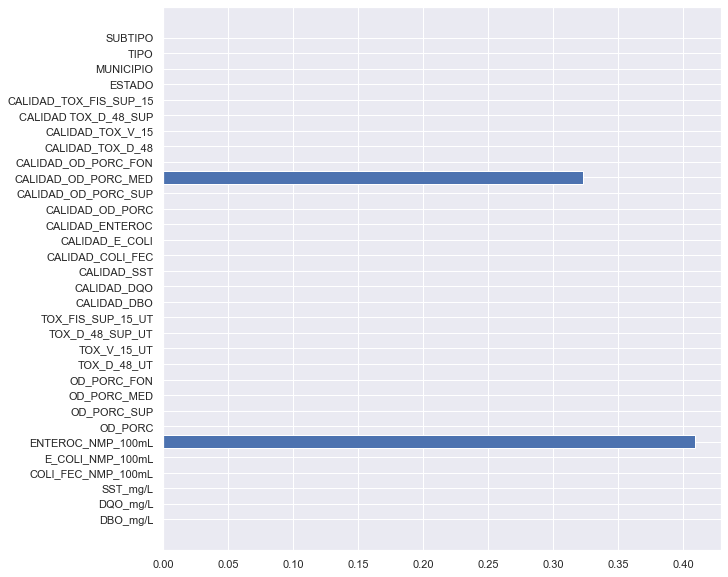

In [22]:
# Gráfica de Feature Importance

per_importances = permutation_importance(pipeline, X1test, Y1test.values.ravel(), n_repeats=10, random_state=42)
for per,val in enumerate(per_importances['importances_mean']):
  print("Feature: %s, Score: %.5f" % (X1train.columns[per],val))

sns.set(rc={'figure.figsize':(10,10)})
plt.barh(X1train.columns.to_numpy(), per_importances['importances_mean'])
plt.show()

## **Modelo Random Forest para Dataset 1: Aguas Superficiales**

In [23]:
# MODELO RANDOM FOREST, aplicamos la misma lógica que para Decision Tree

modeloRFC = RandomForestClassifier(random_state = 0)


# Nuevamente, dejamos el mejor modelo de alpha, criterion y class weight después de "jugar" con el gridsearch
# Se decide eliminar del grid los criterios de max_depth y min_samples con el objetivo de tener un modelo
# menos complejo y lograr reducir el sobreentrenamiento que encontramos


dicc_gridRFC = {'m2__ccp_alpha':[0.2],
              'm2__criterion':['gini'],
        #      'm__max_depth':[1,8,15,20],
        #      'm__min_samples_split':[2,5,10],
              'm2__class_weight':['balanced'],
                           }


pipeline2 = Pipeline(steps=[('ct',CT1),('m2',modeloRFC)])
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
  

gridRFC = GridSearchCV(estimator=pipeline2, 
                    param_grid=dicc_gridRFC, 
                    cv=cv, 
                    scoring= make_scorer(mi_gmean))


gridRFC.fit(X1train, np.ravel(Y1train))
gridRFC.best_params_

print('Mejor valor obtenido con la mejor combinación:', gridRFC.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', gridRFC.best_params_)
print('Métrica utilizada:', gridRFC.scoring)

Mejor valor obtenido con la mejor combinación: 0.9811154268002913
Mejor combinación de valores encontrados de los hiperparámetros: {'m2__ccp_alpha': 0.2, 'm2__class_weight': 'balanced', 'm2__criterion': 'gini'}
Métrica utilizada: make_scorer(mi_gmean)


In [24]:
# Analizamos las métricas ahora con el mejor modelo de Random Forest 

modeloRFC_Optimizado = RandomForestClassifier(ccp_alpha=gridRFC.best_params_.get('m2__ccp_alpha'),                               
                                    class_weight=gridRFC.best_params_.get('m2__class_weight'),                                
                                    criterion=gridRFC.best_params_.get('m2__criterion'),
                                   # min_samples_split=gridRFC.best_params_.get('m__min_samples_split'),
                                   # max_depth = gridRFC.best_params_.get('m__max_depth'),
                                    random_state = 42)

# for key, metric in mismetricas.items():
resultados1 = list()   
pipeline2a = Pipeline(steps=[('ct',CT1),('m2',modeloRFC_Optimizado)])
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

scores = cross_validate(pipeline2a, X1train, np.ravel(Y1train), scoring=mismetricas, cv=cv, return_train_score=True)


resultados1.append(scores)
print('\nmean Train Accuracy: %.3f (%.4f)\nmean Test Accuracy: %.3f (%.4f)\n\nmean Train Precision: %.3f (%.4f)\nmean Test Precision: %.3f (%.4f)\n\nmean Train Recall: %.3f (%.4f)\nmean Test Recall: %.3f (%.4f)\n\nmean Train Gmean: %.3f (%.4f)\nmean Test Gmean: %.3f (%.4f)\n\nmean Train f1-score: %.3f (%.4f)\nmean Test f1-score: %.3f (%.4f)\n' % (
                                                                                                 np.mean(resultados1[0]['train_Accuracy']),
                                                                                                 np.std(resultados1[0]['train_Accuracy']),
                                                                                                 np.mean(resultados1[0]['test_Accuracy']),
                                                                                                 np.std(resultados1[0]['test_Accuracy']),
                                                                                                 np.mean(resultados1[0]['train_Precision']),
                                                                                                 np.std(resultados1[0]['train_Precision']),  
                                                                                                 np.mean(resultados1[0]['test_Precision']),
                                                                                                 np.std(resultados1[0]['test_Precision']),  
                                                                                                 np.mean(resultados1[0]['train_Recall']),
                                                                                                 np.std(resultados1[0]['train_Recall']),
                                                                                                 np.mean(resultados1[0]['test_Recall']),
                                                                                                 np.std(resultados1[0]['test_Recall']),
                                                                                                 np.mean(resultados1[0]['train_Gmean']),
                                                                                                 np.std(resultados1[0]['train_Gmean']),
                                                                                                 np.mean(resultados1[0]['test_Gmean']),
                                                                                                 np.std(resultados1[0]['test_Gmean']),
                                                                                                 np.mean(resultados1[0]['train_F1Score']),
                                                                                                 np.std(resultados1[0]['train_F1Score']), 
                                                                                                 np.mean(resultados1[0]['test_F1Score']),
                                                                                                 np.std(resultados1[0]['test_F1Score']), 
                                                                                                  ))


mean Train Accuracy: 0.986 (0.0036)
mean Test Accuracy: 0.985 (0.0044)

mean Train Precision: 0.980 (0.0053)
mean Test Precision: 0.978 (0.0065)

mean Train Recall: 0.980 (0.0053)
mean Test Recall: 0.978 (0.0065)

mean Train Gmean: 0.985 (0.0040)
mean Test Gmean: 0.984 (0.0049)

mean Train f1-score: 0.980 (0.0053)
mean Test f1-score: 0.978 (0.0065)



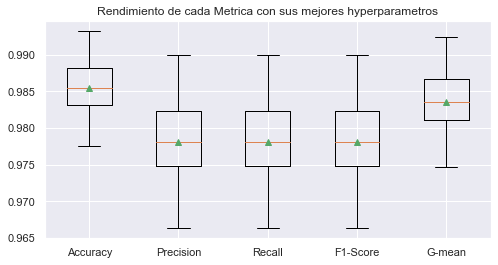

In [25]:
# Imprimimos el boxplot de cada una de las métricas para Random Forest

sns.set(rc={'figure.figsize':(8,4)})
nombres = ['Accuracy','Precision','Recall','F1-Score','G-mean']
lista_metrica = ['test_Accuracy','test_Precision','test_Recall','test_F1Score','test_Gmean']
bpGmean2 = list()
for i in range(0,len(lista_metrica)):
  rr = resultados1[0][lista_metrica[i]]
  bpGmean2.append(rr)
plt.title('Rendimiento de cada Metrica con sus mejores hyperparametros')
plt.boxplot(bpGmean2, labels = nombres, showmeans=True)
plt.show()

In [26]:
# Mandamos llamar las función para ahora graficar Random Forest en su curva de entrenamiento,
# con los mejores hiperparámetros obtenidos del modelo

def mi_ModeloYCurvasRFC(Xin):
      

    modeloRFC_Optimizado = RandomForestClassifier(ccp_alpha=gridRFC.best_params_.get('m2__ccp_alpha'),                               
                                    class_weight=gridRFC.best_params_.get('m2__class_weight'),                                
                                    criterion=gridRFC.best_params_.get('m2__criterion'),
                                  #  min_samples_split=gridRFC.best_params_.get('m__min_samples_split'),
                                  #  max_depth = gridRFC.best_params_.get('m__max_depth'),
                                    random_state = 42)

    pipeline2b = Pipeline(steps=[('ct',CT1),('m2',modeloRFC_Optimizado)])


    mi_kfold = RepeatedKFold(n_splits=5, n_repeats=3,random_state=42)

       
    delta_train_sz = np.linspace(0.1, 1.0, num=40)

    tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline2b ,    
                                                        X = Xin,
                                                        y = np.ravel(Y1train),
                                                        cv = mi_kfold,
                                                        train_sizes = delta_train_sz,
                                                        scoring = make_scorer(mi_gmean),
                                                        random_state=42)
     
    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, "Accuracy")



Curvas de aprendizaje del modelo Random Forest para Aguas Superficiales:


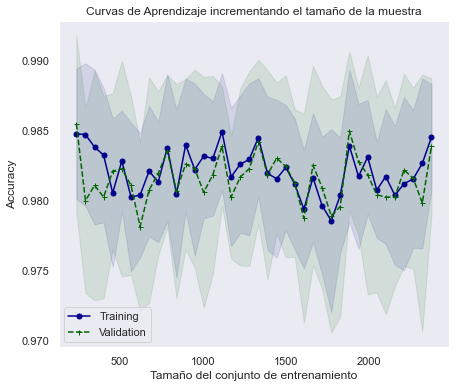

In [27]:
print('Curvas de aprendizaje del modelo Random Forest para Aguas Superficiales:')
mi_ModeloYCurvasRFC(X1train)

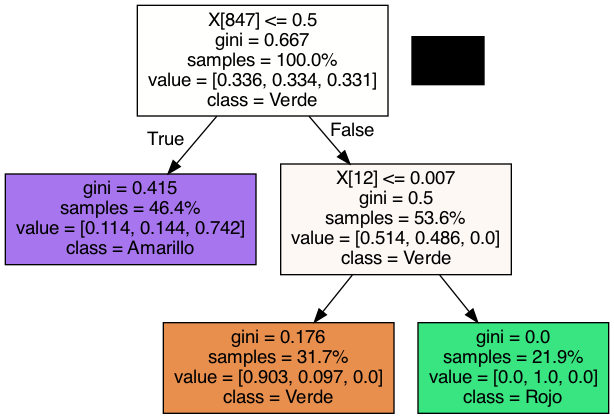

In [28]:
# Graficamos el árbol de decisiones que obtuvimos para el Random Forest, con los mejores hiperparámetros
# obtenidos, eliminando los que ya comentamos en el gridsearch, min_samples y max_depth

modeloRFC_Optimizado = RandomForestClassifier(ccp_alpha=gridRFC.best_params_.get('m2__ccp_alpha'),                               
                                    class_weight=gridRFC.best_params_.get('m2__class_weight'),                                
                                    criterion=gridRFC.best_params_.get('m2__criterion'),
                                  #  min_samples_split=gridRFC.best_params_.get('m__min_samples_split'),
                                  #  max_depth = gridRFC.best_params_.get('m__max_depth'),
                                    random_state = 42)


Z=np.ravel(Y1train)
Xct1 = CT1.fit(X1train)
Xxt1 = Xct1.transform(X1train)
modeloRFC_Optimizado.fit(Xxt1, Z)
estimator = modeloRFC_Optimizado.estimators_[10]



dot_data2 = tree.export_graphviz(estimator, 
                                out_file=None,
                                max_depth=gridRFC.best_params_.get('m2__max_depth'),
                                
                                class_names=["Verde","Rojo","Amarillo"],
                                filled=True,
                                rotate=False,
                                proportion=True)

graph2 = pydotplus.graph_from_dot_data(dot_data2)
Image(graph2.create_png())

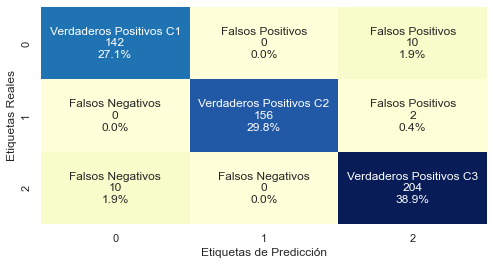

In [29]:
# Matriz de confusión con los mejores hiperparámetros de Random Forest

pipeline2z = Pipeline(steps=[('ct',CT1),('m2',modeloRFC_Optimizado)])

pipeline2z.fit(X1train, Z)

yhat2z = pipeline2z.predict(X1test)

cm2z = confusion_matrix(Y1test, yhat2z)

txt = ['Verdaderos Positivos C1','Falsos Positivos','Falsos Positivos',
       'Falsos Negativos','Verdaderos Positivos C2', 'Falsos Positivos',
       'Falsos Negativos','Falsos Negativos','Verdaderos Positivos C3']
frecuencia = ["{0:0.0f}".format(value) for value in cm2z.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in cm2z.flatten()/np.sum(cm2z)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
labels = np.asarray(labels).reshape(3,3)
labels
ax = sns.heatmap(cm2z, annot=labels, fmt='', cmap='YlGnBu', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
plt.show()

Feature: DBO_mg/L, Score: 0.00000
Feature: DQO_mg/L, Score: 0.00286
Feature: SST_mg/L, Score: 0.00000
Feature: COLI_FEC_NMP_100mL, Score: -0.00019
Feature: E_COLI_NMP_100mL, Score: 0.00000
Feature: ENTEROC_NMP_100mL, Score: 0.00324
Feature: OD_PORC, Score: 0.00000
Feature: OD_PORC_SUP, Score: 0.00000
Feature: OD_PORC_MED, Score: -0.00095
Feature: OD_PORC_FON, Score: -0.00821
Feature: TOX_D_48_UT, Score: 0.00000
Feature: TOX_V_15_UT, Score: 0.00000
Feature: TOX_D_48_SUP_UT, Score: 0.00229
Feature: TOX_FIS_SUP_15_UT, Score: 0.00000
Feature: CALIDAD_DBO, Score: 0.00000
Feature: CALIDAD_DQO, Score: 0.00248
Feature: CALIDAD_SST, Score: 0.00000
Feature: CALIDAD_COLI_FEC, Score: 0.00000
Feature: CALIDAD_E_COLI, Score: 0.00000
Feature: CALIDAD_ENTEROC, Score: 0.00286
Feature: CALIDAD_OD_PORC, Score: 0.00000
Feature: CALIDAD_OD_PORC_SUP, Score: 0.00000
Feature: CALIDAD_OD_PORC_MED, Score: -0.00592
Feature: CALIDAD_OD_PORC_FON, Score: -0.00649
Feature: CALIDAD_TOX_D_48, Score: 0.00000
Feature: C

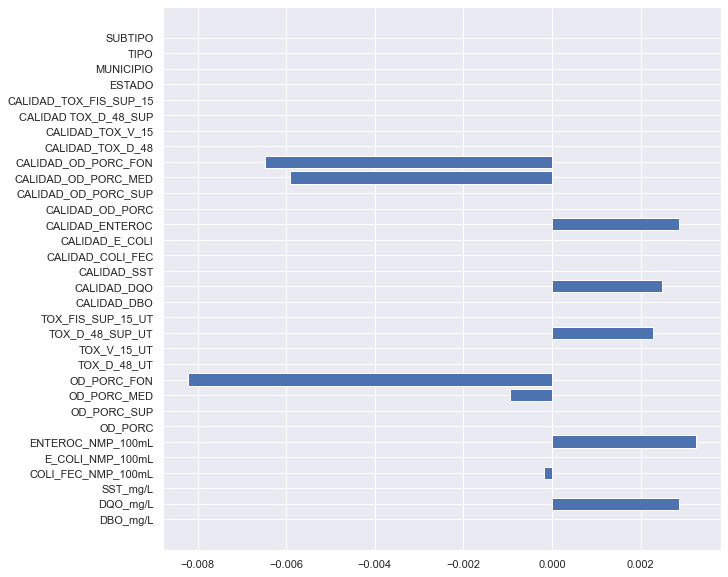

In [31]:
# Gráfica de Feature Importance

per_importances = permutation_importance(pipeline2z, X1test, Y1test.values.ravel(), n_repeats=10, random_state=42)
for per,val in enumerate(per_importances['importances_mean']):
  print("Feature: %s, Score: %.5f" % (X1train.columns[per],val))

sns.set(rc={'figure.figsize':(10,10)})
plt.barh(X1train.columns.to_numpy(), per_importances['importances_mean'])
plt.show()

## **Fin de Análisis de Aguas Superficiales**



## **Análisis para Dataset 2: Aguas Subterráneas**

**En este punto, la idea es aplicar los modelos de Decision Tree y Random Forest. Para ambos modelos, la idea es aplicar un GridSearch para encontrar los mejores hiperparámetros. Con estos mejores hiperparámetros analizamos las distintas métricas, las graficamos en boxplot, sacamos la matriz de confusión, obtenemos la gráfica de curvas de entrenamiento y finalmente obtenemos el gráfico comparativo precision vs recall.**

In [32]:
# Empezamos a analizar con Decision Tree
# Decision Tree para Aguas Subterráneas

#scaler = MinMaxScaler(feature_range=(1,3))
#Y2E=scaler.fit_transform(Y2train)

modeloDT2 = DecisionTreeClassifier(random_state = 42)

#0.020
dicc_gridDT2 = {'m3__ccp_alpha':[0.015],
              'm3__criterion':['gini','entropy'],
              'm3__max_depth':[1,8,15,20],
              'm3__min_samples_split':[2,5,10],
              'm3__class_weight':['balanced'],
                           }

                          
 
pipeline2 = Pipeline(steps=[('ct',CT2),('m3',modeloDT2)])
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
  

gridDT2 = GridSearchCV(estimator=pipeline2, 
                    param_grid=dicc_gridDT2, 
                    cv=cv, 
                    scoring= make_scorer(mi_gmean))


gridDT2.fit(X2train, Y2train)
gridDT2.best_params_

print('Mejor valor obtenido con la mejor combinación:', gridDT2.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', gridDT2.best_params_)
print('Métrica utilizada:', gridDT2.scoring)

Mejor valor obtenido con la mejor combinación: 0.9629730869235488
Mejor combinación de valores encontrados de los hiperparámetros: {'m3__ccp_alpha': 0.015, 'm3__class_weight': 'balanced', 'm3__criterion': 'entropy', 'm3__max_depth': 15, 'm3__min_samples_split': 10}
Métrica utilizada: make_scorer(mi_gmean)


In [33]:
# En este punto, con los mejores hiperparámetros obtenidos, se procede a analizar cada una de las métricas


modeloDT_Optimizado2 = DecisionTreeClassifier(max_depth=gridDT2.best_params_.get('m3__max_depth'),
                                    ccp_alpha=gridDT2.best_params_.get('m3__ccp_alpha'),                               
                                    class_weight=gridDT2.best_params_.get('m3__class_weight'),                                
                                    criterion=gridDT2.best_params_.get('m3__criterion'),
                                    min_samples_split=gridDT2.best_params_.get('m3__min_samples_split'),
                                    random_state = 42)

# for key, metric in mismetricas.items():
resultados3 = list()   
pipeline3 = Pipeline(steps=[('ct',CT2),('m3',modeloDT_Optimizado2)])
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)



scores3 = cross_validate(pipeline3, X2train, np.ravel(Y2train), scoring=mismetricas, cv=cv, return_train_score=True)


resultados3.append(scores3)

print('\nmean Train Accuracy: %.3f (%.4f)\nmean Test Accuracy: %.3f (%.4f)\n\nmean Train Precision: %.3f (%.4f)\nmean Test Precision: %.3f (%.4f)\n\nmean Train Recall: %.3f (%.4f)\nmean Test Recall: %.3f (%.4f)\n\nmean Train Gmean: %.3f (%.4f)\nmean Test Gmean: %.3f (%.4f)\n\nmean Train F1score: %.3f (%.4f)\nmean Test F1score: %.3f (%.4f)\n' % (
                                                                                                 np.mean(resultados3[0]['train_Accuracy']),
                                                                                                 np.std(resultados3[0]['train_Accuracy']),
                                                                                                 np.mean(resultados3[0]['test_Accuracy']),
                                                                                                 np.std(resultados3[0]['test_Accuracy']),
                                                                                                 np.mean(resultados3[0]['train_Precision']),
                                                                                                 np.std(resultados3[0]['train_Precision']),  
                                                                                                 np.mean(resultados3[0]['test_Precision']),
                                                                                                 np.std(resultados3[0]['test_Precision']),  
                                                                                                 np.mean(resultados3[0]['train_Recall']),
                                                                                                 np.std(resultados3[0]['train_Recall']),
                                                                                                 np.mean(resultados3[0]['test_Recall']),
                                                                                                 np.std(resultados3[0]['test_Recall']),
                                                                                                 np.mean(resultados3[0]['train_Gmean']),
                                                                                                 np.std(resultados3[0]['train_Gmean']),
                                                                                                 np.mean(resultados3[0]['test_Gmean']),
                                                                                                 np.std(resultados3[0]['test_Gmean']),
                                                                                                 np.mean(resultados3[0]['train_F1Score']),
                                                                                                 np.std(resultados3[0]['train_F1Score']), 
                                                                                                 np.mean(resultados3[0]['test_F1Score']),
                                                                                                 np.std(resultados3[0]['test_F1Score']), 
                                                                                                  ))


mean Train Accuracy: 0.984 (0.0075)
mean Test Accuracy: 0.967 (0.0138)

mean Train Precision: 0.975 (0.0112)
mean Test Precision: 0.951 (0.0208)

mean Train Recall: 0.975 (0.0112)
mean Test Recall: 0.951 (0.0208)

mean Train Gmean: 0.982 (0.0084)
mean Test Gmean: 0.963 (0.0156)

mean Train F1score: 0.975 (0.0112)
mean Test F1score: 0.951 (0.0208)



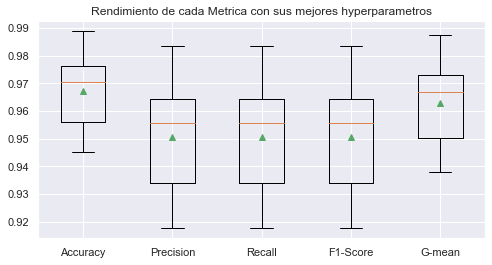

In [34]:
# Se hace un BoxPlot graficando las métricas obtenidas arriba 

sns.set(rc={'figure.figsize':(8,4)})
nombres = ['Accuracy','Precision','Recall','F1-Score','G-mean']
lista_metrica = ['test_Accuracy','test_Precision','test_Recall','test_F1Score','test_Gmean']
bpGmean3 = list()
for i in range(0,len(lista_metrica)):
  rr = resultados3[0][lista_metrica[i]]
  bpGmean3.append(rr)
plt.title('Rendimiento de cada Metrica con sus mejores hyperparametros')
plt.boxplot(bpGmean3, labels = nombres, showmeans=True)
plt.show()

In [35]:
# A continuación se definen las funciones para lanzar la gráfica de curva de entrenamiento 

def mi_ModeloYCurvasDT2(Xin):
      

    modeloDT_Optimizado = DecisionTreeClassifier(max_depth=gridDT2.best_params_.get('m__max_depth'),
                                    ccp_alpha=gridDT2.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridDT2.best_params_.get('m__class_weight'),                                
                                    criterion=gridDT2.best_params_.get('m__criterion'),
                                    min_samples_split=gridDT2.best_params_.get('m__min_samples_split'),
                                    random_state = 42)

    pipeline = Pipeline(steps=[('ct',CT2),('m3',modeloDT_Optimizado2)])


    mi_kfold = RepeatedKFold(n_splits=5, n_repeats=3,random_state=42)

       
    delta_train_sz = np.linspace(0.1, 1.0, num=40)

    tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline ,    
                                                        X = Xin,
                                                        y = Y2train,
                                                        cv = mi_kfold,
                                                        train_sizes = delta_train_sz,
                                                        scoring = make_scorer(mi_gmean),
                                                        random_state=42)
     
    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, "Accuracy")
    

Curvas de aprendizaje del modelo Decision Tree para Aguas Subterráneas:


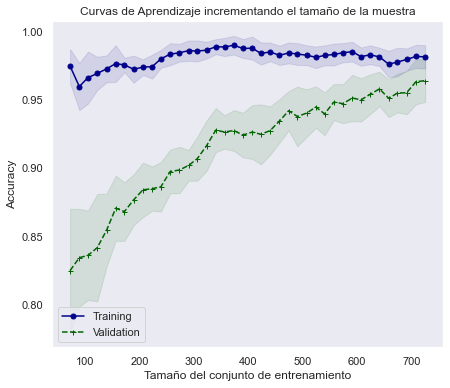

In [36]:
print('Curvas de aprendizaje del modelo Decision Tree para Aguas Subterráneas:')
mi_ModeloYCurvasDT2(X2train)

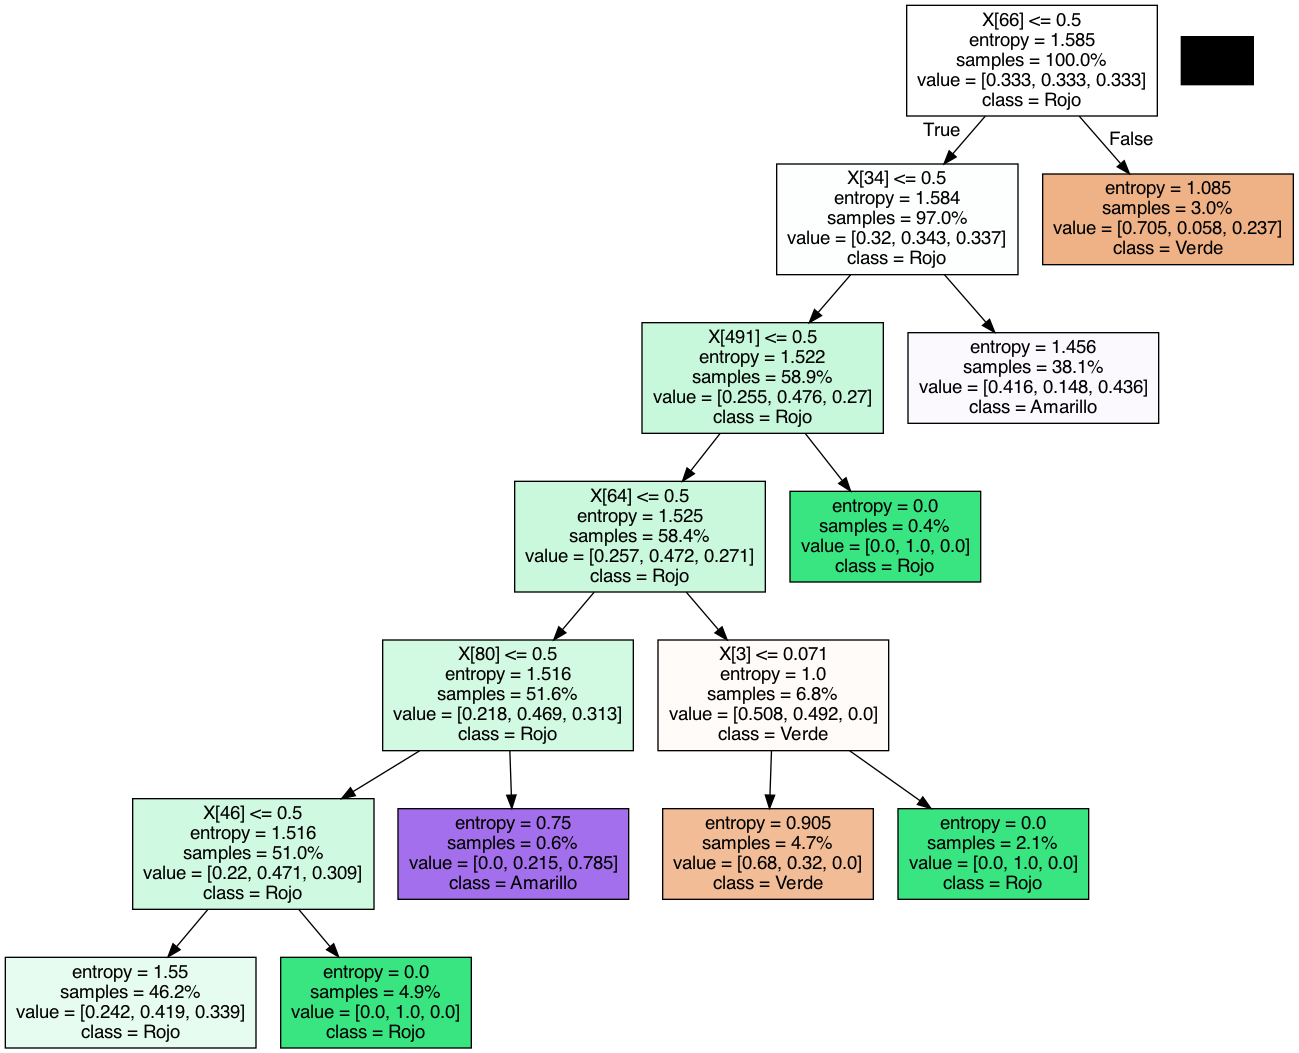

In [37]:
# Nuevamente, con los mejores hiperparámetros del DT, graficamos el árbol de decisiones 


modeloDT_Optimizado2 = DecisionTreeClassifier(max_depth=gridDT2.best_params_.get('m3__max_depth'),
                                    ccp_alpha=gridDT2.best_params_.get('m3__ccp_alpha'),                               
                                    class_weight=gridDT2.best_params_.get('m3__class_weight'),                                
                                    criterion=gridDT2.best_params_.get('m3__criterion'),
                                    min_samples_split=gridDT2.best_params_.get('m3__min_samples_split'),
                                    random_state = 42,
                                    max_features = 5)
Xct3 = CT2.fit(X2train)
Xxt3 = Xct3.transform(X2train)
modeloDT_Optimizado2.fit(Xxt3, Y2train)


dot_data3 = tree.export_graphviz(decision_tree=modeloDT_Optimizado2, 
                                out_file=None,
                                max_depth=gridDT2.best_params_.get('m3__max_depth'),
                                
                                class_names=["Verde","Rojo","Amarillo"],
                                filled=True,
                                rotate=False,
                                proportion=True)

graph3 = pydotplus.graph_from_dot_data(dot_data3)
Image(graph3.create_png())

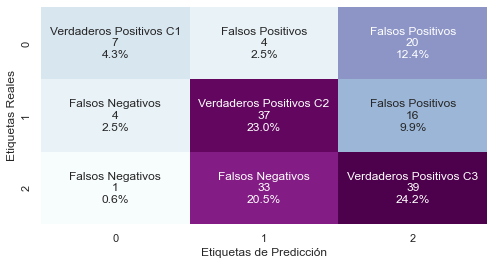

In [38]:
# Obtenemos la matriz de confusión con los mejores hiperparámetros 

pipeline3b = Pipeline(steps=[('ct',CT2),('m3',modeloDT_Optimizado2)])

pipeline3b.fit(X2train, Y2train)

yhat3 = pipeline3b.predict(X2test)

cm3 = confusion_matrix(Y2test, yhat3)

txt = ['Verdaderos Positivos C1','Falsos Positivos','Falsos Positivos',
       'Falsos Negativos','Verdaderos Positivos C2', 'Falsos Positivos',
       'Falsos Negativos','Falsos Negativos','Verdaderos Positivos C3']
frecuencia = ["{0:0.0f}".format(value) for value in cm3.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in cm3.flatten()/np.sum(cm3)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
labels = np.asarray(labels).reshape(3,3)
labels
ax = sns.heatmap(cm3, annot=labels, fmt='', cmap='BuPu', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
plt.show()

Feature: ALC_mg/L, Score: 0.00000
Feature: CONDUCT_mS/cm, Score: 0.00000
Feature: SDT_M_mg/L, Score: 0.00000
Feature: FLUORUROS_mg/L, Score: 0.01491
Feature: DUR_mg/L, Score: 0.00000
Feature: COLI_FEC_NMP/100_mL, Score: 0.00000
Feature: N_NO3_mg/L, Score: 0.00000
Feature: AS_TOT_mg/L, Score: 0.00000
Feature: CD_TOT_mg/L, Score: 0.00000
Feature: CR_TOT_mg/L, Score: 0.00000
Feature: HG_TOT_mg/L, Score: 0.00000
Feature: PB_TOT_mg/L, Score: 0.00000
Feature: MN_TOT_mg/L, Score: 0.00000
Feature: FE_TOT_mg/L, Score: 0.00000
Feature: ESTADO, Score: -0.00373
Feature: MUNICIPIO, Score: 0.00000
Feature: SUBTIPO, Score: 0.00000
Feature: CALIDAD_ALC, Score: 0.00000
Feature: CALIDAD_CONDUC, Score: 0.00000
Feature: CALIDAD_SDT_ra, Score: 0.00000
Feature: CALIDAD_SDT_salin, Score: 0.00000
Feature: CALIDAD_FLUO, Score: 0.07764
Feature: CALIDAD_DUR, Score: 0.00000
Feature: CALIDAD_COLI_FEC, Score: 0.00000
Feature: CALIDAD_N_NO3, Score: 0.00000
Feature: CALIDAD_AS, Score: 0.00000
Feature: CALIDAD_CD, Sco

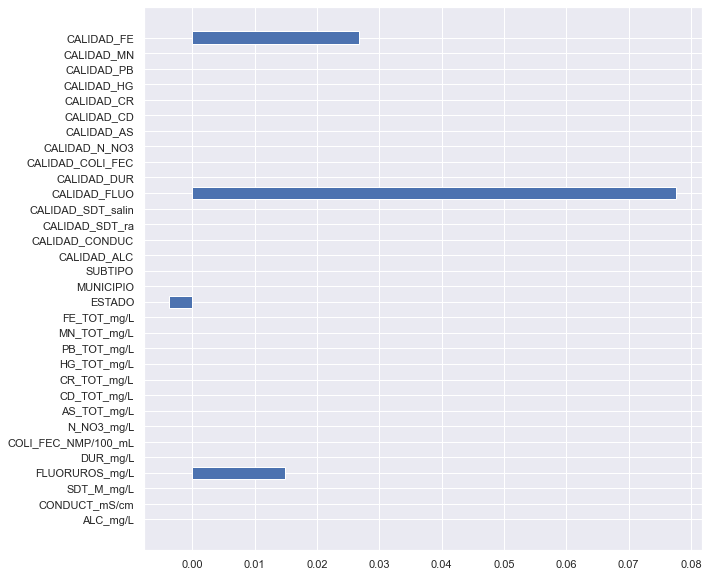

In [41]:
# Gráfica de Feature Importance

per_importances = permutation_importance(pipeline3b, X2test, Y2test.values.ravel(), n_repeats=10, random_state=42)
for per,val in enumerate(per_importances['importances_mean']):
  print("Feature: %s, Score: %.5f" % (X2train.columns[per],val))

sns.set(rc={'figure.figsize':(10,10)})
plt.barh(X2train.columns.to_numpy(), per_importances['importances_mean'])
plt.show()

## **Modelo Random Forest para Dataset 2: Aguas Subterráneas**

In [42]:
# MODELO RANDOM FOREST, aplicamos la misma lógica que para Decision Tree

modeloRFC2 = RandomForestClassifier(random_state = 0)

dicc_gridRFC2 = {'m4__ccp_alpha':[0.003],
              'm4__criterion':['gini'],
        #      'm__max_depth':[1,8,15,20],
        #      'm__min_samples_split':[2,5,10],
              'm4__class_weight':['balanced'],
                           }


pipeline4 = Pipeline(steps=[('ct',CT2),('m4',modeloRFC2)])
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
  

gridRFC2 = GridSearchCV(estimator=pipeline4, 
                    param_grid=dicc_gridRFC2, 
                    cv=cv, 
                    scoring= make_scorer(mi_gmean))


gridRFC2.fit(X2train, np.ravel(Y2train))
gridRFC2.best_params_

print('Mejor valor obtenido con la mejor combinación:', gridRFC2.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', gridRFC2.best_params_)
print('Métrica utilizada:', gridRFC2.scoring)

Mejor valor obtenido con la mejor combinación: 0.966023844119356
Mejor combinación de valores encontrados de los hiperparámetros: {'m4__ccp_alpha': 0.003, 'm4__class_weight': 'balanced', 'm4__criterion': 'gini'}
Métrica utilizada: make_scorer(mi_gmean)


In [43]:
# Analizamos las métricas ahora con el mejor modelo de Random Forest 


modeloRFC_Optimizado2 = RandomForestClassifier(ccp_alpha=gridRFC2.best_params_.get('m4__ccp_alpha'),                               
                                    class_weight=gridRFC2.best_params_.get('m4__class_weight'),                                
                                    criterion=gridRFC2.best_params_.get('m4__criterion'),
                                   # min_samples_split=gridRFC.best_params_.get('m__min_samples_split'),
                                   # max_depth = gridRFC.best_params_.get('m__max_depth'),
                                    random_state = 42)

# for key, metric in mismetricas.items():
resultados4 = list()   
pipeline4b = Pipeline(steps=[('ct',CT2),('m4',modeloRFC_Optimizado2)])
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

scores4 = cross_validate(pipeline4b, X2train, np.ravel(Y2train), scoring=mismetricas, cv=cv, return_train_score=True)


resultados4.append(scores4)
print('\nmean Train Accuracy: %.3f (%.4f)\nmean Test Accuracy: %.3f (%.4f)\n\nmean Train Precision: %.3f (%.4f)\nmean Test Precision: %.3f (%.4f)\n\nmean Train Recall: %.3f (%.4f)\nmean Test Recall: %.3f (%.4f)\n\nmean Train Gmean: %.3f (%.4f)\nmean Test Gmean: %.3f (%.4f)\n\nmean Train f1-score: %.3f (%.4f)\nmean Test f1-score: %.3f (%.4f)\n' % (
                                                                                                 np.mean(resultados4[0]['train_Accuracy']),
                                                                                                 np.std(resultados4[0]['train_Accuracy']),
                                                                                                 np.mean(resultados4[0]['test_Accuracy']),
                                                                                                 np.std(resultados4[0]['test_Accuracy']),
                                                                                                 np.mean(resultados4[0]['train_Precision']),
                                                                                                 np.std(resultados4[0]['train_Precision']),  
                                                                                                 np.mean(resultados4[0]['test_Precision']),
                                                                                                 np.std(resultados4[0]['test_Precision']),  
                                                                                                 np.mean(resultados4[0]['train_Recall']),
                                                                                                 np.std(resultados4[0]['train_Recall']),
                                                                                                 np.mean(resultados4[0]['test_Recall']),
                                                                                                 np.std(resultados4[0]['test_Recall']),
                                                                                                 np.mean(resultados4[0]['train_Gmean']),
                                                                                                 np.std(resultados4[0]['train_Gmean']),
                                                                                                 np.mean(resultados4[0]['test_Gmean']),
                                                                                                 np.std(resultados4[0]['test_Gmean']),
                                                                                                 np.mean(resultados4[0]['train_F1Score']),
                                                                                                 np.std(resultados4[0]['train_F1Score']), 
                                                                                                 np.mean(resultados4[0]['test_F1Score']),
                                                                                                 np.std(resultados4[0]['test_F1Score']), 
                                                                                                  ))


mean Train Accuracy: 0.994 (0.0026)
mean Test Accuracy: 0.969 (0.0106)

mean Train Precision: 0.990 (0.0039)
mean Test Precision: 0.953 (0.0158)

mean Train Recall: 0.990 (0.0039)
mean Test Recall: 0.953 (0.0158)

mean Train Gmean: 0.993 (0.0030)
mean Test Gmean: 0.965 (0.0119)

mean Train f1-score: 0.990 (0.0039)
mean Test f1-score: 0.953 (0.0158)



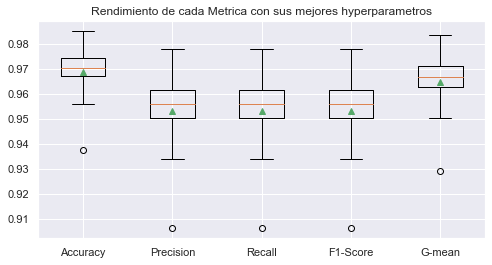

In [44]:
# Imprimimos el boxplot de cada una de las métricas para Random Forest


sns.set(rc={'figure.figsize':(8,4)})
nombres = ['Accuracy','Precision','Recall','F1-Score','G-mean']
lista_metrica = ['test_Accuracy','test_Precision','test_Recall','test_F1Score','test_Gmean']
bpGmean4 = list()
for i in range(0,len(lista_metrica)):
  rr = resultados4[0][lista_metrica[i]]
  bpGmean4.append(rr)
plt.title('Rendimiento de cada Metrica con sus mejores hyperparametros')
plt.boxplot(bpGmean4, labels = nombres, showmeans=True)
plt.show()

In [45]:
# Mandamos llamar las función para ahora graficar Random Forest en su curva de entrenamiento,
# con los mejores hiperparámetros obtenidos del modelo

def mi_ModeloYCurvasRFC2(Xin):
      

    modeloRFC_Optimizado2 = RandomForestClassifier(ccp_alpha=gridRFC2.best_params_.get('m4__ccp_alpha'),                               
                                    class_weight=gridRFC2.best_params_.get('m4__class_weight'),                                
                                    criterion=gridRFC2.best_params_.get('m4__criterion'),
                                  #  min_samples_split=gridRFC.best_params_.get('m__min_samples_split'),
                                  #  max_depth = gridRFC.best_params_.get('m__max_depth'),
                                    random_state = 42)

    pipeline4c = Pipeline(steps=[('ct',CT2),('m4',modeloRFC_Optimizado2)])


    mi_kfold = RepeatedKFold(n_splits=5, n_repeats=3,random_state=42)

       
    delta_train_sz = np.linspace(0.1, 1.0, num=40)

    tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline4c ,    
                                                        X = Xin,
                                                        y = np.ravel(Y2train),
                                                        cv = mi_kfold,
                                                        train_sizes = delta_train_sz,
                                                        scoring = make_scorer(mi_gmean),
                                                        random_state=42)
     
    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, "Accuracy")

Curvas de aprendizaje del modelo Random Forest para Aguas Subterráneas:


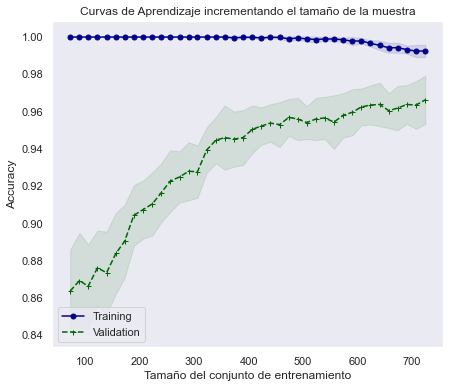

In [46]:
print('Curvas de aprendizaje del modelo Random Forest para Aguas Subterráneas:')
mi_ModeloYCurvasRFC2(X2train)

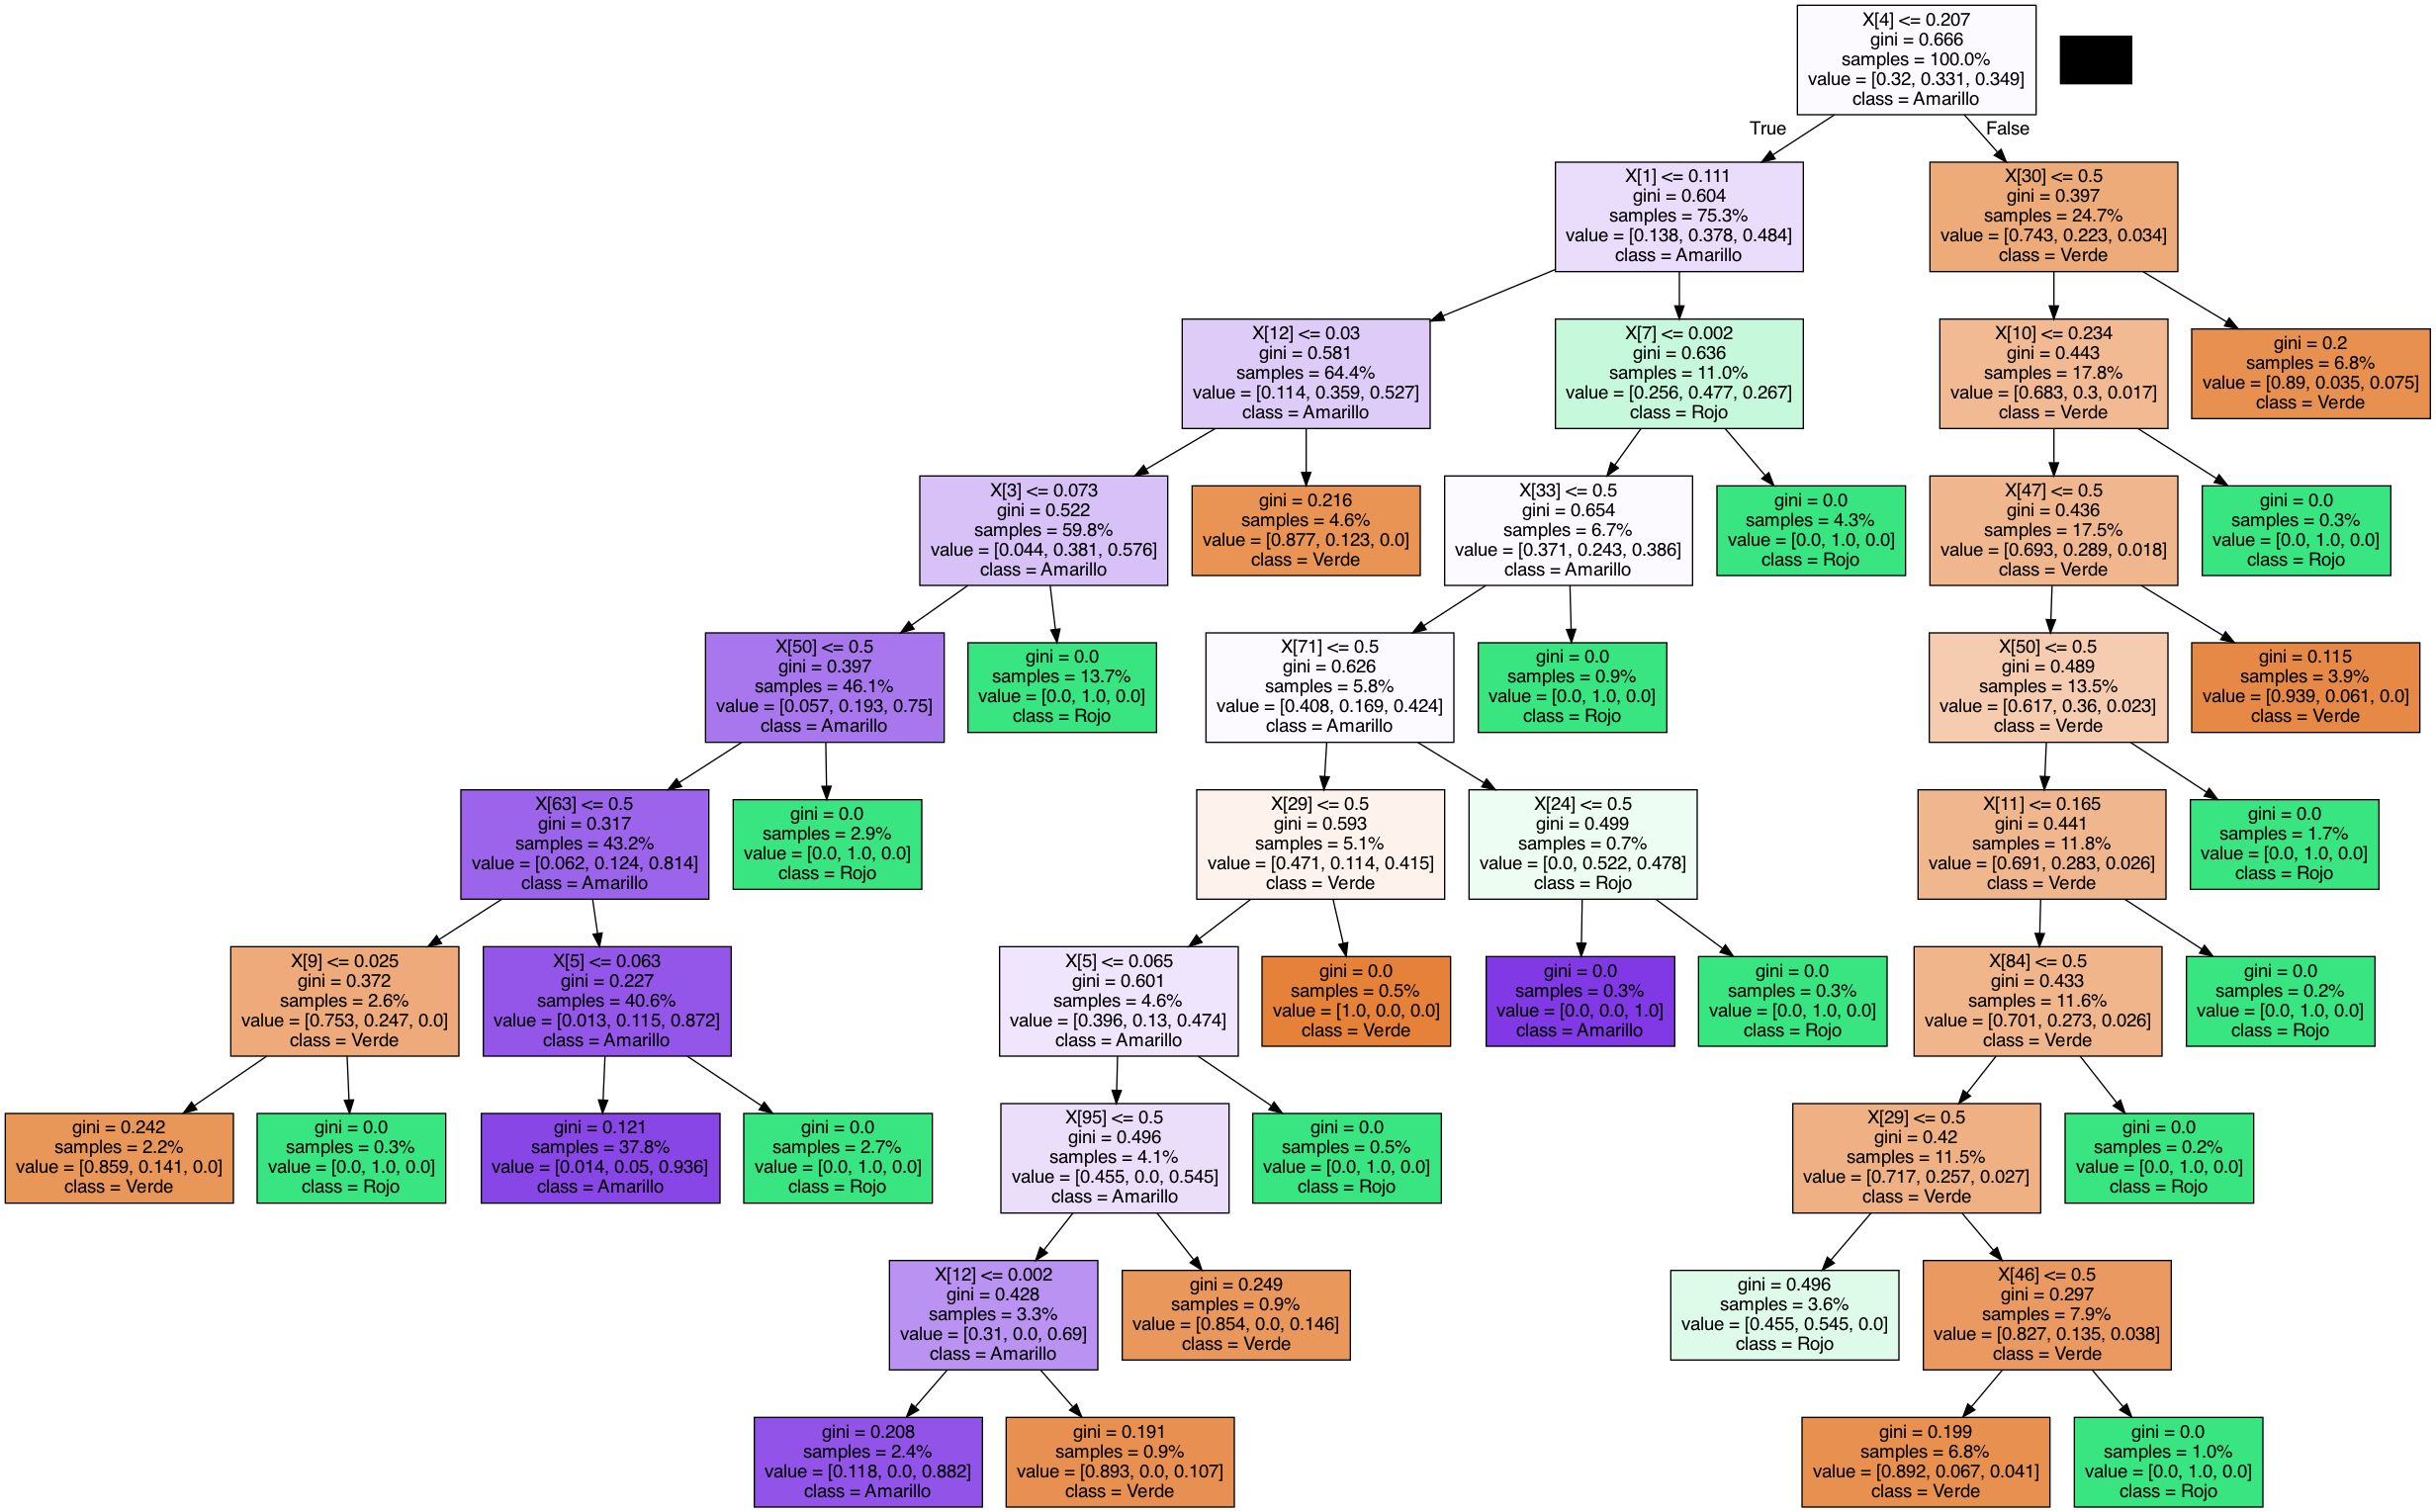

In [47]:
# Graficamos el árbol de decisiones que obtuvimos para el Random Forest, con los mejores hiperparámetros
# obtenidos, eliminando los que ya comentamos en el gridsearch, min_samples y max_depth

modeloRFC_Optimizado2 = RandomForestClassifier(ccp_alpha=gridRFC2.best_params_.get('m4__ccp_alpha'),                               
                                    class_weight=gridRFC2.best_params_.get('m4__class_weight'),                                
                                    criterion=gridRFC2.best_params_.get('m4__criterion'),
                                  #  min_samples_split=gridRFC.best_params_.get('m__min_samples_split'),
                                  #  max_depth = gridRFC.best_params_.get('m__max_depth'),
                                    random_state = 42)


Z2=np.ravel(Y2train)
Xct4 = CT2.fit(X2train)
Xxt4 = Xct4.transform(X2train)
modeloRFC_Optimizado2.fit(Xxt4, Z2)
estimator2 = modeloRFC_Optimizado2.estimators_[9]



dot_data4 = tree.export_graphviz(estimator2, 
                                out_file=None,
                                max_depth=gridRFC2.best_params_.get('m2__max_depth'),
                                
                                class_names=["Verde","Rojo","Amarillo"],
                                filled=True,
                                rotate=False,
                                proportion=True)

graph4 = pydotplus.graph_from_dot_data(dot_data4)
Image(graph4.create_png())

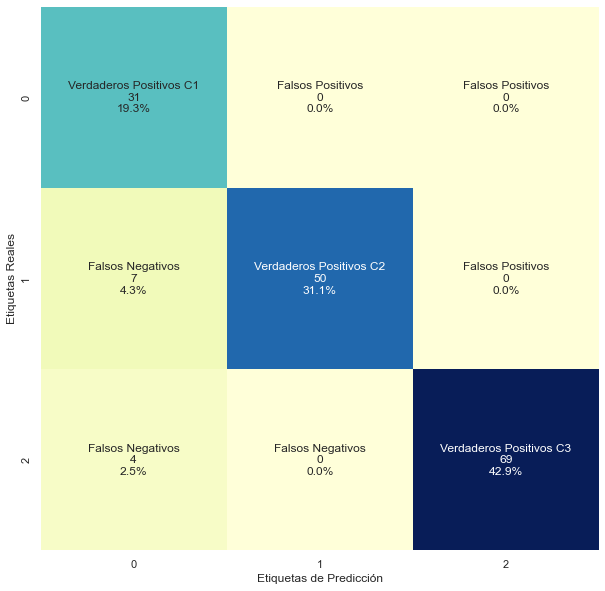

In [50]:
# Matriz de confusión con los mejores hiperparámetros de Random Forest

pipeline4d = Pipeline(steps=[('ct', CT2),('m4',modeloRFC_Optimizado2)])

pipeline4d.fit(X2train, np.ravel(Y2train))

yhat4 = pipeline4d.predict(X2test)

cm4 = confusion_matrix(Y2test, yhat4)

txt = ['Verdaderos Positivos C1','Falsos Positivos','Falsos Positivos',
       'Falsos Negativos','Verdaderos Positivos C2', 'Falsos Positivos',
       'Falsos Negativos','Falsos Negativos','Verdaderos Positivos C3']
frecuencia = ["{0:0.0f}".format(value) for value in cm4.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in cm4.flatten()/np.sum(cm4)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
labels = np.asarray(labels).reshape(3,3)
labels
ax = sns.heatmap(cm4, annot=labels, fmt='', cmap='YlGnBu', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
plt.show()

Feature: ALC_mg/L, Score: -0.00248
Feature: CONDUCT_mS/cm, Score: -0.01056
Feature: SDT_M_mg/L, Score: -0.01863
Feature: FLUORUROS_mg/L, Score: 0.04286
Feature: DUR_mg/L, Score: 0.00062
Feature: COLI_FEC_NMP/100_mL, Score: 0.03665
Feature: N_NO3_mg/L, Score: 0.04534
Feature: AS_TOT_mg/L, Score: 0.00870
Feature: CD_TOT_mg/L, Score: 0.00000
Feature: CR_TOT_mg/L, Score: 0.00000
Feature: HG_TOT_mg/L, Score: 0.00000
Feature: PB_TOT_mg/L, Score: 0.00000
Feature: MN_TOT_mg/L, Score: 0.00062
Feature: FE_TOT_mg/L, Score: 0.01925
Feature: ESTADO, Score: 0.00062
Feature: MUNICIPIO, Score: 0.00000
Feature: SUBTIPO, Score: 0.00000
Feature: CALIDAD_ALC, Score: -0.00062
Feature: CALIDAD_CONDUC, Score: -0.00994
Feature: CALIDAD_SDT_ra, Score: -0.01118
Feature: CALIDAD_SDT_salin, Score: -0.02547
Feature: CALIDAD_FLUO, Score: 0.05466
Feature: CALIDAD_DUR, Score: 0.00994
Feature: CALIDAD_COLI_FEC, Score: 0.03354
Feature: CALIDAD_N_NO3, Score: 0.05404
Feature: CALIDAD_AS, Score: 0.02298
Feature: CALIDAD_C

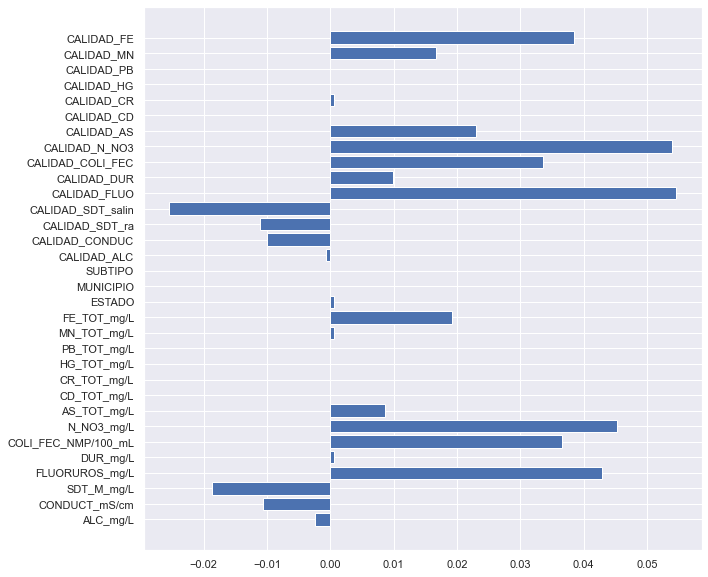

In [51]:
# Gráfica de Feature Importance

per_importances = permutation_importance(pipeline4d, X2test, Y2test.values.ravel(), n_repeats=10, random_state=42)
for per,val in enumerate(per_importances['importances_mean']):
  print("Feature: %s, Score: %.5f" % (X2train.columns[per],val))

sns.set(rc={'figure.figsize':(10,10)})
plt.barh(X2train.columns.to_numpy(), per_importances['importances_mean'])
plt.show()



## **Métodos Adicionales para Evaluación**

**En este punto la idea es proponer la evaluación de modelos adicionales para ambos Datasets. En este punto no buscaremos mejores hiperparámetros, solamente evaluaremos los modelos con algunos parámetros estándar para ver que tal se comportan. Estaremos evaluando:**

**- Regresión Logística**

**- Red Neuronal MPL**

**- SVM**

**- Isolation Forest**

In [52]:
# Se cargan las librerías necesarias para que funcionen los modelos

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import IsolationForest

In [53]:
# Se crea una función con la lista de los modelos y sus nombres, con la intención de aplicarlos en un for 

def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LogisticRegression(solver='liblinear'))
  nombres.append('Regresión Logística')
  
  # MLP - Red Neuronal Artificial / Perceptrón Lineal Multicapa:  
  modelos.append(MLPClassifier(hidden_layer_sizes=(30,), max_iter=3000))
  nombres.append('Red Neuronal MLP')
  
  # SVM - Máquina de Vector Soporte:
  modelos.append(SVC(gamma='scale'))
  nombres.append('SVM')

  # IF - Isolation Forest
  modelos.append(IsolationForest(n_estimators=30,random_state=42))
  nombres.append('Isolation Forest')
  
  return modelos, nombres

In [54]:
# Se crea una función de matriz de confusión para poder aplicar a cada uno de los modelos 

def CM_modelosextra(CT,modelo,X,Y,Xtest,Ytest):

    pipeline5 = Pipeline(steps=[('CTZ', CT),('mZ',modelo)])

    pipeline5.fit(X, Y)

    yhat5 = pipeline5.predict(Xtest)

    cm5 = confusion_matrix(Ytest, yhat5)

    txt = ['Verdaderos Positivos C1','Falsos Positivos','Falsos Positivos',
           'Falsos Negativos','Verdaderos Positivos C2', 'Falsos Positivos',
           'Falsos Negativos','Falsos Negativos','Verdaderos Positivos C3']
    frecuencia = ["{0:0.0f}".format(value) for value in cm5.flatten()]
    porcentaje = ["{0:.1%}".format(value) for value in cm5.flatten()/np.sum(cm5)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
    labels = np.asarray(labels).reshape(3,3)
    labels
    ax = sns.heatmap(cm5, annot=labels, fmt='', cmap='Reds', cbar=False)
    ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
    plt.show()

In [55]:
# Se crea una función de gráfica de curvas de entrenamiento para poder aplicar a cada uno de los modelos 


def mi_ModeloYCurvas_modelosextra(Xin,Yin,modelo,CT):
      

    pipeline5 = Pipeline(steps=[('CTZ', CT),('mZ',modelo)])


    mi_kfold = RepeatedKFold(n_splits=5, n_repeats=3,random_state=42)

       
    delta_train_sz = np.linspace(0.1, 1.0, num=40)

    tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline5 ,    
                                                        X = Xin,
                                                        y = np.ravel(Yin),
                                                        cv = mi_kfold,
                                                        train_sizes = delta_train_sz,
                                                        scoring = make_scorer(mi_gmean),
                                                        random_state=42)
     
    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, "Accuracy")

In [56]:
# Se crea una función para obtener los hard y soft voting para los ensables


def Ensambles(CT,Xtrain,Ytrain,Xtest,Ytest):
    classifiers = [ ['Regresión Logística:',  modelos[0]],
                    ['Red Neuronal MLP: ', modelos[1]],
                    ['DecisionTree :',modeloDT_Optimizado],
                    ['RandomForest :',modeloRFC_Optimizado] 
                  ]

    Xct = CT.fit(Xtrain)
    Xxt = Xct.transform(Xtrain)

    Xcte = CT.fit(Xtrain)
    Xxte = Xcte.transform(Xtest)


    eclf1 = VotingClassifier(estimators=[('Regresión Logística', modelos[0]), ('Red Neuronal MLP', modelos[1]),  
                                         ('DecisionTree :',modeloDT_Optimizado),('RandomForest :',modeloRFC_Optimizado)], 
                             voting='soft')
    eclf1.fit(Xxt, np.ravel(Ytrain))
    predictions = eclf1.predict(Xxte)
    print("\nVotos Soft")
    print(classification_report(Ytest, predictions))
    print("\n")

    eclf2 = VotingClassifier(estimators=[('Regresión Logística', modelos[0]), ('Red Neuronal MLP', modelos[1]),
                                         ('DecisionTree :',modeloDT_Optimizado),('RandomForest :',modeloRFC_Optimizado)],
                             voting='hard')

    eclf2.fit(Xxt, np.ravel(Ytrain))
    predictions2 = eclf2.predict(Xxte)
    print("Votos Hard")
    print(classification_report(Ytest, predictions2))
    return eclf1,eclf2

Promedio Gmean >> Regresión Logística: 0.998 (0.002)


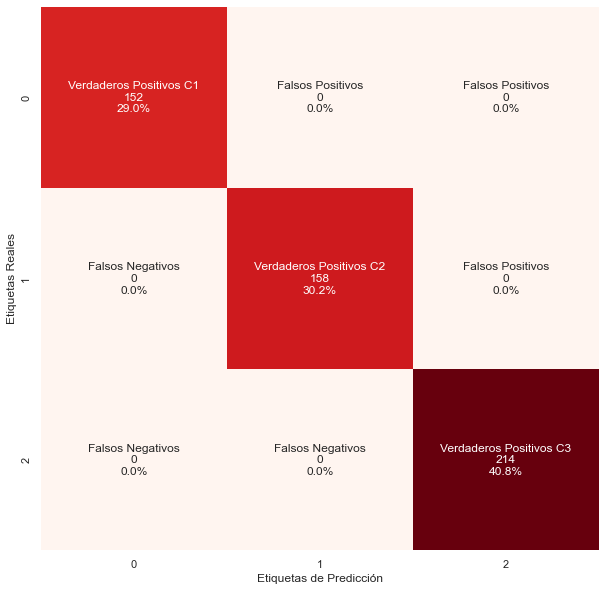

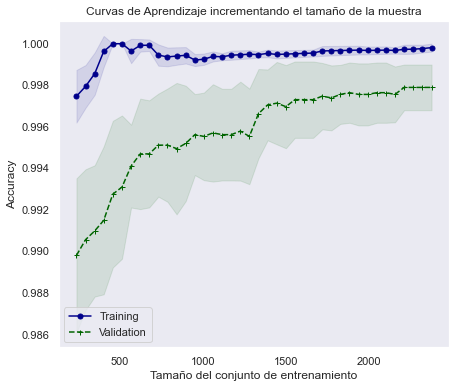

Promedio Gmean >> Red Neuronal MLP: 0.999 (0.002)


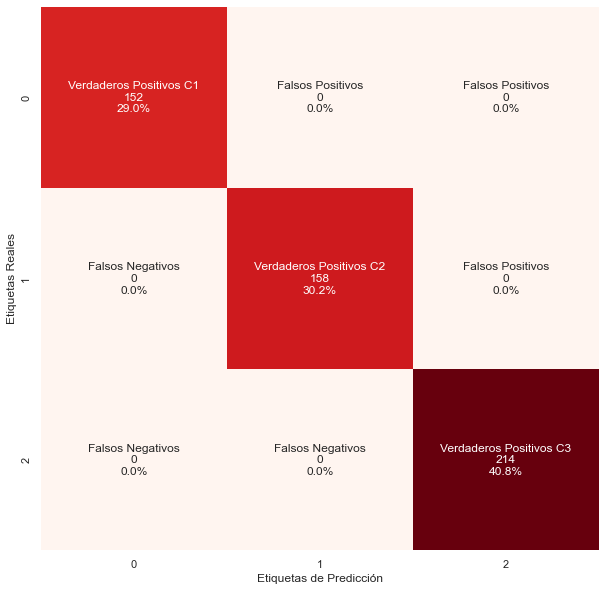

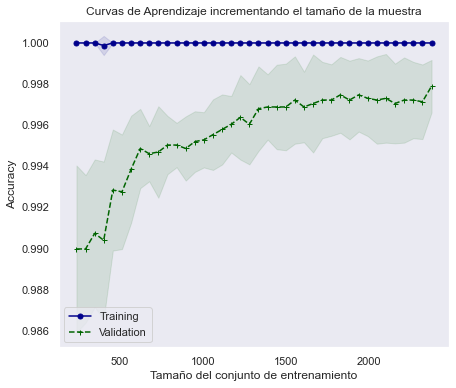

Promedio Gmean >> SVM: 0.997 (0.003)


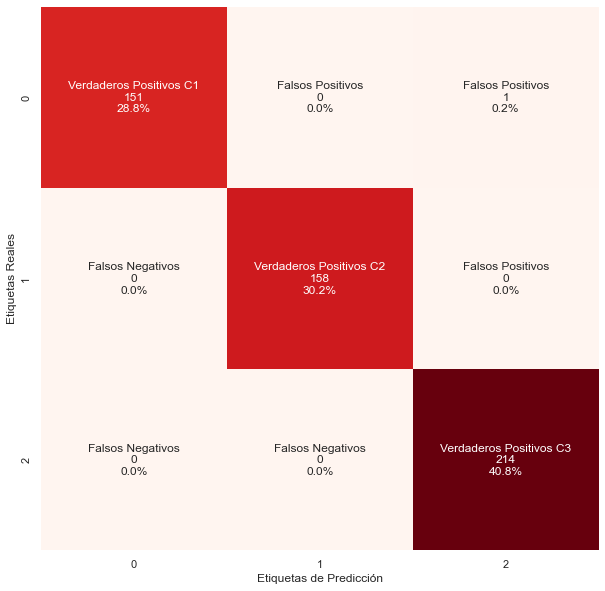

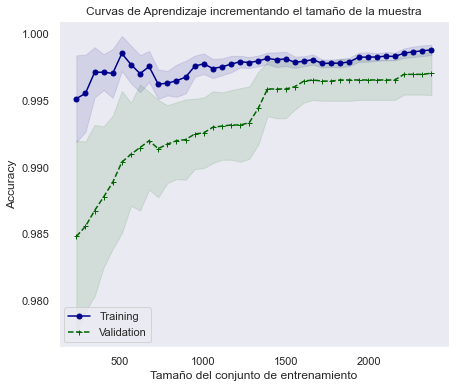

Promedio Gmean >> Isolation Forest: 0.454 (0.025)


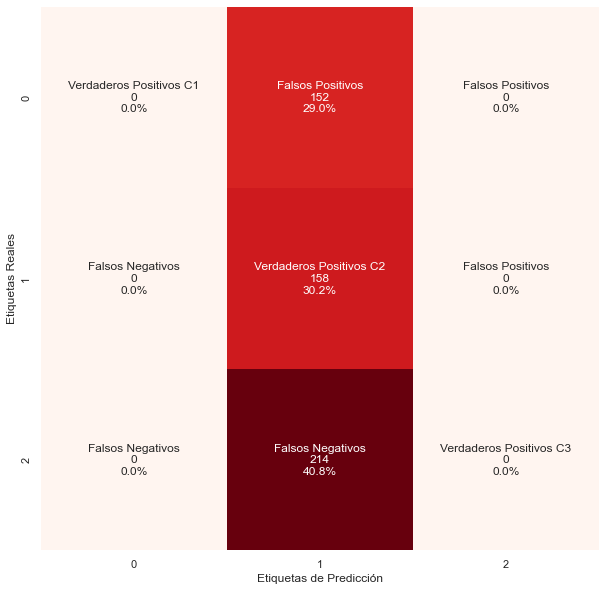

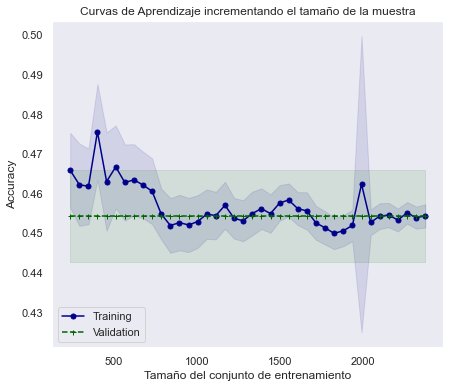


Votos Soft
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       152
           1       1.00      1.00      1.00       158
           2       1.00      1.00      1.00       214

    accuracy                           1.00       524
   macro avg       1.00      1.00      1.00       524
weighted avg       1.00      1.00      1.00       524



Votos Hard
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       158
           2       1.00      1.00      1.00       214

    accuracy                           1.00       524
   macro avg       1.00      1.00      1.00       524
weighted avg       1.00      1.00      1.00       524



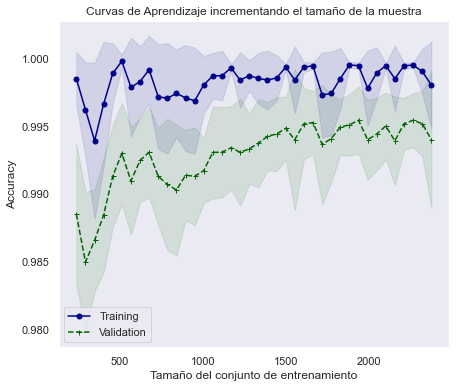

In [57]:
# Ciclo for para Aguas Superficiales, en el cual a cada modelo lo evaluamos con Gmean, sacamos matriz de confusión
# y obtenemos la curva de entrenamiento del modelo 

modelos, nombres = get_models()
resultados_adicionales = list()   

for i in range(len(modelos)):

  pipeline_ma = Pipeline(steps=[('ct',CT1),('ma',modelos[i])])

  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)
  scores_ma = cross_val_score(pipeline_ma, X1train, np.ravel(Y1train), scoring=make_scorer(mi_gmean), cv=cv)


  resultados_adicionales.append(scores_ma)
  print('Promedio Gmean >> %s: %.3f (%.3f)' % (nombres[i], np.mean(scores_ma), np.std(scores_ma)))
  CM_modelosextra(CT1,modelos[i],X1train,np.ravel(Y1train),X1test,np.ravel(Y1test))
  mi_ModeloYCurvas_modelosextra(X1train,Y1train,modelos[i],CT1)

eclf1_1,eclf2_1 = Ensambles(CT1,X1train,Y1train,X1test,Y1test)

mi_ModeloYCurvas_modelosextra(X1train,Y1train,eclf1_1,CT1)

Promedio Gmean >> Regresión Logística: 0.975 (0.014)


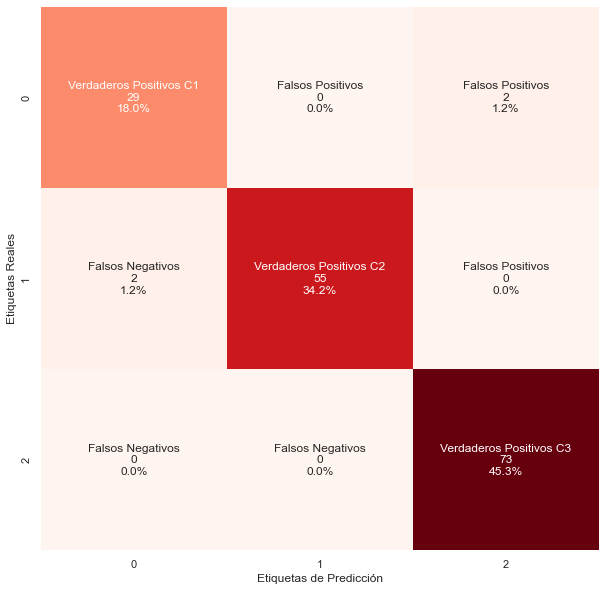

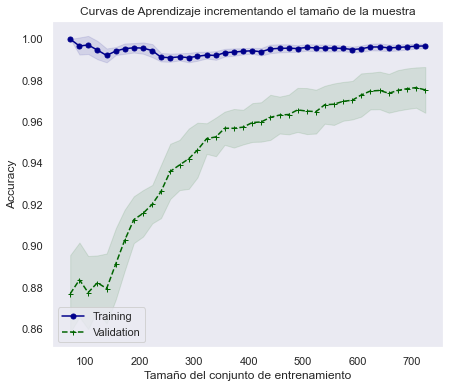

Promedio Gmean >> Red Neuronal MLP: 0.982 (0.010)


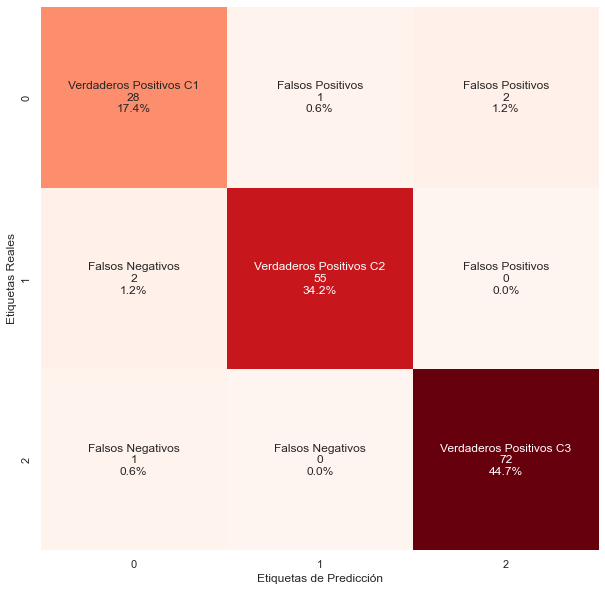

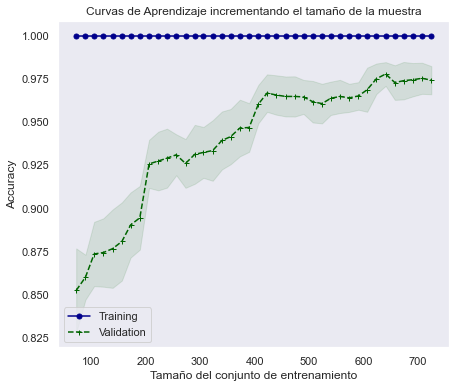

Promedio Gmean >> SVM: 0.985 (0.011)


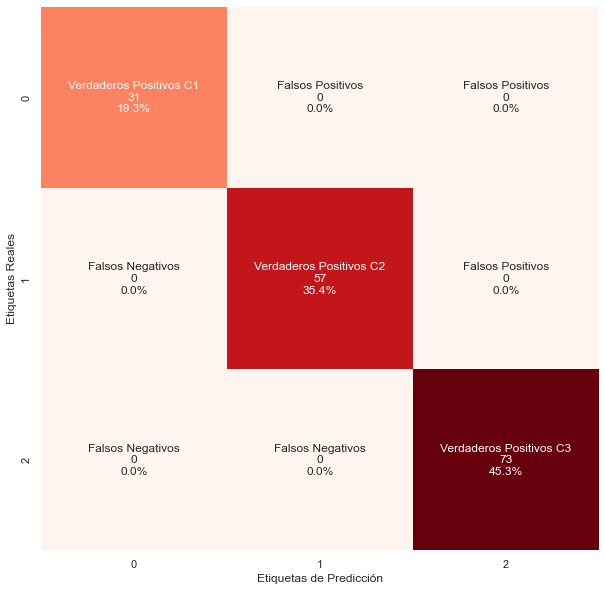

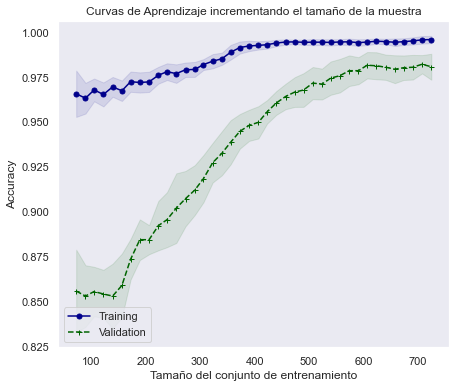

Promedio Gmean >> Isolation Forest: 0.498 (0.037)


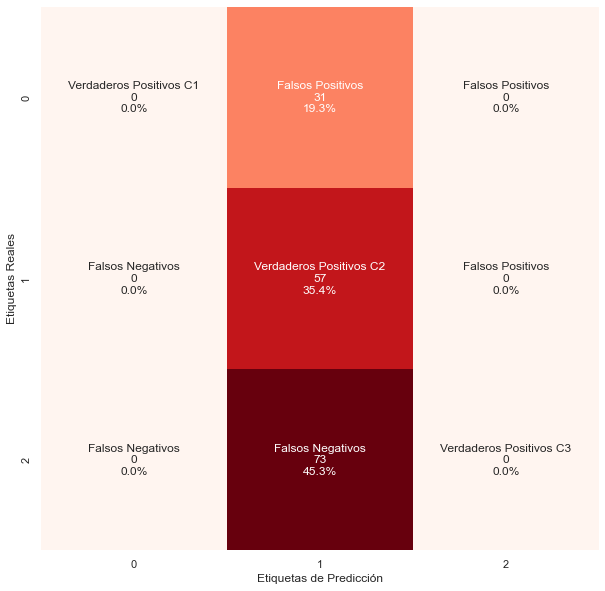

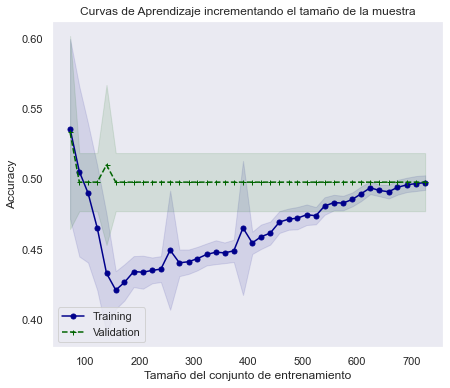


Votos Soft
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        31
           1       0.98      0.96      0.97        57
           2       0.97      1.00      0.99        73

    accuracy                           0.97       161
   macro avg       0.96      0.96      0.96       161
weighted avg       0.97      0.97      0.97       161



Votos Hard
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        31
           1       0.98      0.96      0.97        57
           2       0.97      1.00      0.99        73

    accuracy                           0.97       161
   macro avg       0.96      0.96      0.96       161
weighted avg       0.97      0.97      0.97       161



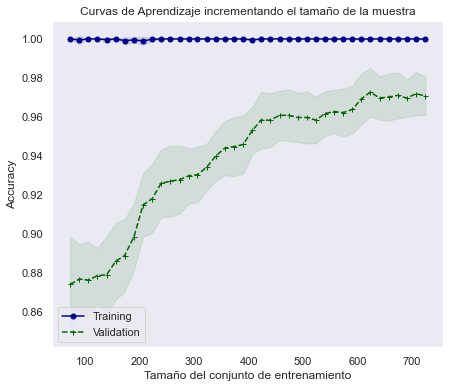

In [58]:
# Ciclo for para Aguas Subterráneas, en el cual a cada modelo lo evaluamos con Gmean, sacamos matriz de confusión
# y obtenemos la curva de entrenamiento del modelo 

modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados_adicionales2 = list()   

for i in range(len(modelos)):

  pipeline_ma2 = Pipeline(steps=[('ct',CT2),('ma',modelos[i])])

  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)
  scores_ma2 = cross_val_score(pipeline_ma2, X2train, np.ravel(Y2train), scoring=make_scorer(mi_gmean), cv=cv)


  resultados_adicionales2.append(scores_ma2)
  print('Promedio Gmean >> %s: %.3f (%.3f)' % (nombres[i], np.mean(scores_ma2), np.std(scores_ma2)))
  CM_modelosextra(CT2,modelos[i],X2train,np.ravel(Y2train),X2test,np.ravel(Y2test))
  mi_ModeloYCurvas_modelosextra(X2train,Y2train,modelos[i],CT2)

eclf1_2,eclf2_2 = Ensambles(CT2,X2train,Y2train,X2test,Y2test)

mi_ModeloYCurvas_modelosextra(X2train,Y2train,eclf1_2,CT2)

## **Conclusiones y Análisis de la Actividad**

Para ambos conjuntos, encontramos que los modelos propuestos de Decision Tree como de Random Forest proveeen de una gran exactitud al modelo, pues las eficiencias de las métricas utilizadas en general fueron muy altas. Para evaluar los distintos modelos, en general decidimos enfocar nuestros esfuerzos en la métrica de G-mean. La lógica detrás de esta decisión está basada en el hecho de que consideramos que es igual de grave dictaminar que un cuerpo de agua está contaminado cuando en realidad no lo está (pues incluir medidas de limpieza adicionales provocaría gastos económicos gubernamentales fuertes que no son necesarias y ese dinero se puede usar en otra cosa) que dictaminar que un cuerpo de agua es limpio cuando en realidad no lo está (esto podría provocar el uso de agua contaminada en actividades agropecuarias). G-mean es una métrica que mide tanto sensibilidad como especificidad, entonces en ese sentido consideramos que con esta métrica estaríamos considerando tanto Falsos Positivos como Falsos Negativos. 

De igual manera, es importante considerar que hicimos pruebas con Decision Tree para involucrar al modelo solamente las variables numéricas, vs incluir las categóricas y las numéricas. Utilizar solo las variables numéricas nos iba a ayudar a entender mejor las decisiones de Decision Tree, pues para el dataset completo aplicamos OneHotEncoder y de esa forma perdemos información de cómo toma la decisión. Sin embargo, al aplicar el modelo solamente con variables numéricas, encontramos un modelo aún más sobreentrenado (como lo veremos a continuación), por lo que decidimos proseguir en el resto del ejercicio utilizando todas las variables disponibles.

El dataset de Aguas Superficiales, al evaluarlo con DT y RF presenta un sobreentrenamiento muy grande, mucho más marcado para el modelo de RF, a pesar de utilizar gridsearch para buscar sus mejores hiperparámetros. Esto también se puede comprobar con la cantidad de nodos que cada árbol de cada modelo presentó, pues en ambos casos no pasa de 5 niveles para hacer la clasificación del Semáforo. Derivado de eso, es que decidimos aplicar más modelos -ya sin buscar mejores hiperparámetros- para ver cómo se comportaban con el dataset. De estos modelos, el que peor desempeño tuvo fue el Isolation Forest, lo cual tiene sentido pues es un modelo que está enfocado en detectar anomalías, y el tipo de información que tenemos en estos dataset no está orientado a ese tipo de cuestiones, pues las 3 clases (rojo,amarillo,verde) están balanceadas. De estos modelos, consideramos que el mejor modelo es el SVM, pues analizando la matriz de confusión, las clases verdaderas (en Test) ocupan el 99%. De los dos modelos de DT y RF, consideramos el mejor DT pues analizando la matriz de confusión, las clases verdaderas (en Test) ocupan el 63%, mientras que RF apenas alcanzó el 41%. Finalmente hicimos un ensamble en donde consideramos Regresión Logísticas, Redes Neuronales, Decision Tree y Random Forest, la decisión de dejar fuera a SVM fue para revisar si con este ensamble, pudieramos mejorar lo que hace SVM. En este caso consideramos que no fue así, ya que el ensamble presenta el sobreentrenamiento que vimos en DT y RF, y alcanza inclusive un 0.05% menos en la métrica G-mean, comparado con SVM. En el análisis de Feature Importance, vimos que los modelos solamente toman entre 2 o 3 variables, lo cual tiene sentido si tomamos en cuenta que los árboles de DT hacen la clasificación con necesidad de pocos parámetros si la profundidad no es alta, como en el caso de estos Dataset.

El dataset de Aguas Subterráneas, al evaluarlo con DT y RF no presentó tanto sobreentrenamiento, nada que ver comparado con el de Aguas Superficiales. Validando en las curvas de entrenamiento, claramente podemos ver que el modelo empieza su eficiencia en G-mean, para ambos modelos, aproximadamente en 85% y y va aprendiendo hasta llegar al 96%. Al evaluar la partición de Test con la matriz de confusión, para DT las clases positivas tuvieron el 51% y para RF el 92%, por lo que claramente Random Forest fue un mucho mejor modelo. De igual manera, decidimos correr los modelos adicionales para el dataset de Aguas Subterráneas, en donde pudimos ver un entrenamiento similar a DT y RF, a excepción de Isolation Forest que una vez más fue un modelo que en realidad no aprendió. Evaluando las matrices de confusión, el mejor modelo fue el de SVM una vez más, en este caso al tener un 100% de eficiencia al evaluar el conjunto de Test. En este caso, al incluir la función de Ensambles, vimos un entrenamiento muy similar al que presenta SVM, y vimos una mejoría en su métrica G-mean en aproximadamente un 0.01%. Comparando esta mejoría vs la cantidad de cómputo que requiere el ensamble, de igual forma consideramos a SVM como el mejor modelo. En el análisis de Feature Importance, notamos una diferencia respecto a DT, pues para Random Forest las variables involucradas fueron muchas más. Esto tiene sentido si tomamos en cuenta que RF crea "n" Decision Trees diferentes para tomar sus decisiones, razón por la cual necesita muchas variables para seleccionar la mejor ruta.

En resumen generalizado, a pesar de que ambos dataset habla sobre el nivel de contaminación en distintos tipos de agua, se comportaron de una forma muy diferente, y esto tiene sentido porque las variables de entrada eran diferentes y por lo mismo, no eran exactamente las mismas. De los modelos propuestos de Decision Tree y Random Forest comparados entre sí, consideramos que su nivel de aprendizaje no fue tan alto como se pudiera esperar, a pesar de buscar los mejores hiperparámetros para esos modelos. El resultado de SVM fue mucho mejor a pesar de utilizar los parámetros estándar, para ambos dataset, entonces definitivamente un paso próximo sería buscar los mejores hiperparámetros de ese modelo para predecir semáforos individuales en próximos cuerpos de agua a analizar. 